In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score


import xgboost as xgb
from xgboost.sklearn import XGBRegressor

import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
# Feature Importance 
import shap

In [2]:
pisa2018_philippines = pd.read_csv('datasets/pisa2018_philippines.csv')

In [3]:
pisa2018_philippines.head()

CNTRYID    CNTSCHID    CNTSTUID                      STRATUM  EFFORT1  \
0  Philippines  60800001.0  60800289.0  PHL - stratum 12: Region 11      7.0   
1  Philippines  60800001.0  60800533.0  PHL - stratum 12: Region 11      6.0   
2  Philippines  60800001.0  60800604.0  PHL - stratum 12: Region 11     10.0   
3  Philippines  60800001.0  60801150.0  PHL - stratum 12: Region 11      9.0   
4  Philippines  60800001.0  60801220.0  PHL - stratum 12: Region 11      5.0   

   EFFORT2                                              OCOD1  \
0      7.0                                          Housewife   
1      9.0                                Medical secretaries   
2     10.0                                            Missing   
3     10.0    Teaching professionals not elsewhere classified   
4      7.0  Vague(a good job, a quiet job, a well paid job...   

                                               OCOD2  \
0  Vague(a good job, a quiet job, a well paid job...   
1                           Construction supervisors   
2                                            Missing   
3  Professional services managers not elsewhere c...   
4                               Electrical engineers   

                                               OCOD3  GRADE  ...  \
0            Aircraft engine mechanics and repairers    1.0  ...   
1                   Specialist medical practitioners    0.0  ...   
2                                    Police officers    0.0  ...   
3  Aircraft pilots and related associate professi...    1.0  ...   
4  Vague(a good job, a quiet job, a well paid job...    0.0  ...   

                    UNIT WVARSTRR    SENWT             VER_DAT test GENDER  \
0  final variance unit 3      7.0  0.80000    30APR19:12:06:04  NaN      0   
1  final variance unit 3      7.0  0.84215    30APR19:12:06:04  NaN      0   
2  final variance unit 3      7.0  0.84215    30APR19:12:06:04  NaN      0   
3  final variance unit 3      7.0  0.80000    30APR19:12:06:04  NaN      0   
4  final variance unit 3      7.0  0.84215    30APR19:12:06:04  NaN      0   

       MATH   SCIENCE      READ  TOTALSCORE  
0  382.5703  375.1763  365.3463  374.364300  
1  430.8153  478.0337  453.7995  454.216167  
2  329.4409  341.1251  339.1177  336.561233  
3  407.1276  389.5056  404.1598  400.264333  
4  364.8726  385.4762  337.6048  362.651200  

[5 rows x 129 columns]

In [4]:
pisa2018_philippines.describe().round(2).T

count         mean      std          min          25%  \
CNTSCHID    7233.0  60800094.70    54.62  60800001.00  60800047.00   
CNTSTUID    7233.0  60803800.87  2198.18  60800001.00  60801900.00   
EFFORT1     4894.0         8.80     1.58         1.00         8.00   
EFFORT2     4778.0         8.91     1.63         1.00         8.00   
GRADE       7233.0         0.11     0.79        -2.00         0.00   
...            ...          ...      ...          ...          ...   
GENDER      7233.0         0.53     0.50         0.00         0.00   
MATH        7233.0       351.86    71.80       109.13       301.96   
SCIENCE     7233.0       356.13    69.59       167.43       306.72   
READ        7233.0       338.82    76.24       133.68       281.53   
TOTALSCORE  7233.0       348.94    70.21       142.59       298.20   

                    50%          75%          max  
CNTSCHID    60800095.00  60800142.00  60800188.00  
CNTSTUID    60803797.00  60805706.00  60807604.00  
EFFORT1            9.00        10.00        10.00  
EFFORT2           10.00        10.00        10.00  
GRADE              0.00         1.00         3.00  
...                 ...          ...          ...  
GENDER             1.00         1.00         1.00  
MATH             346.90       397.78       628.82  
SCIENCE          344.69       395.28       639.20  
READ             324.68       383.79       655.32  
TOTALSCORE       337.30       390.61       628.71  

[100 rows x 8 columns]

In [5]:
pisa2018_philippines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Columns: 129 entries, CNTRYID to TOTALSCORE
dtypes: float64(99), int64(1), object(29)
memory usage: 7.1+ MB


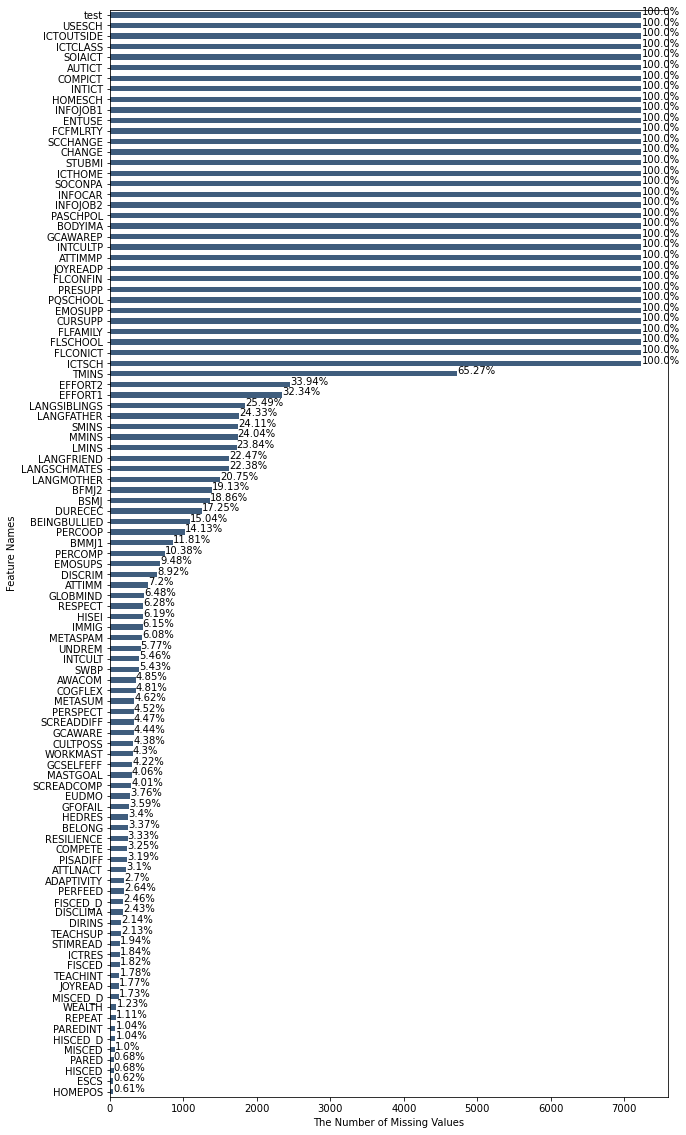

In [6]:
#Checking percentage of null values

Nan = pisa2018_philippines.isnull().sum()[pisa2018_philippines.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/pisa2018_philippines.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [7]:
#Drop column with NAN more than 10%
NanPer = len(pisa2018_philippines) *.90
pisa2018_philippines = pisa2018_philippines.dropna(thresh=NanPer, axis=1)

In [8]:
#split data into train and test
train_philippines , test_philippines  = train_test_split(pisa2018_philippines, test_size=0.2, random_state=42)

print(f"No. of training examples: {train_philippines.shape[0]}")
print(f"No. of testing examples: {test_philippines.shape[0]}")

No. of training examples: 5786
No. of testing examples: 1447


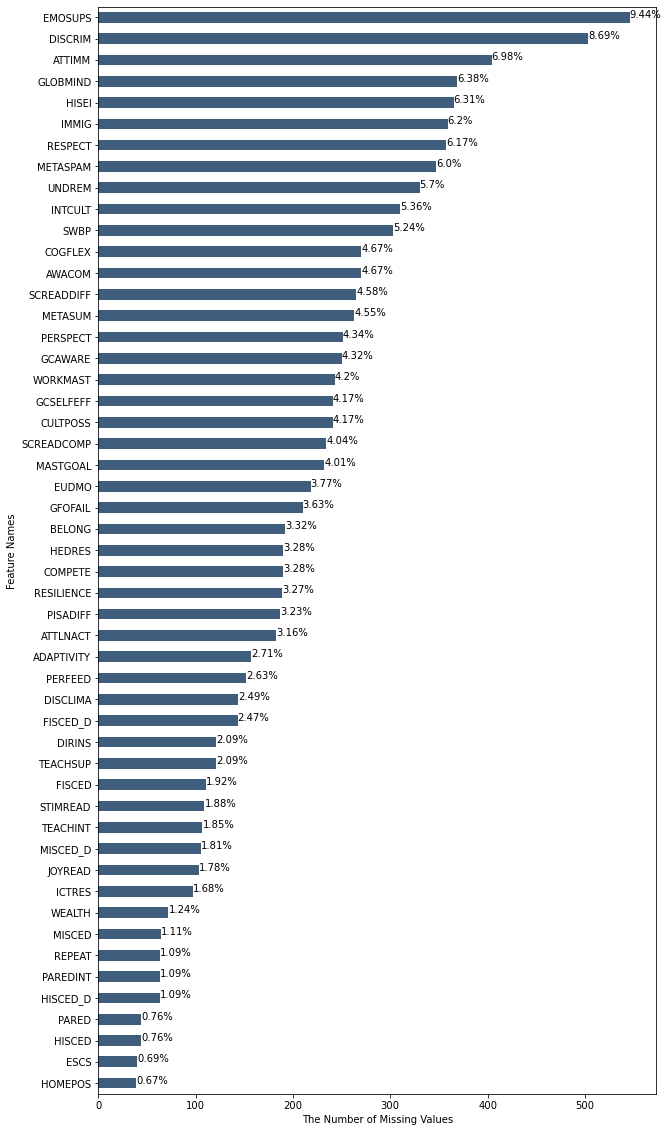

In [9]:
#Checking percentage of null values

Nan = train_philippines.isnull().sum()[train_philippines.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 20), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/train_philippines.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [10]:
train_philippines['GENDER'] = train_philippines['GENDER'].astype('object')
test_philippines['GENDER'] = test_philippines['GENDER'].astype('object')

In [11]:
#Fill NAN values with train columns' median
numvar = train_philippines.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    train_philippines[col].fillna(train_philippines[col].median(), inplace=True)
    test_philippines[col].fillna(train_philippines[col].median(), inplace=True)

In [12]:
#Fill NAN values with train columns' mode
obvar = train_philippines.dtypes =="object"
categorical_features = list(obvar[obvar].index)
for col in categorical_features:
    train_philippines[col].fillna(train_philippines[col].mode()[0], inplace=True)
    test_philippines[col].fillna(train_philippines[col].mode()[0], inplace=True)

In [13]:
categorical_features

['CNTRYID',
 'STRATUM',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'IMMIG',
 'REPEAT',
 'UNIT',
 'VER_DAT',
 'GENDER']

In [14]:
train_philippines.isnull().sum().sum(),test_philippines.isnull().sum().sum()

(0, 0)

In [15]:
list(train_philippines.columns)

['CNTRYID',
 'CNTSCHID',
 'CNTSTUID',
 'STRATUM',
 'OCOD1',
 'OCOD2',
 'OCOD3',
 'GRADE',
 'AGE',
 'PROGN',
 'COBN_S',
 'COBN_M',
 'COBN_F',
 'LANGN',
 'ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'PARED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'PAREDINT',
 'HISEI',
 'IMMIG',
 'REPEAT',
 'ESCS',
 'UNDREM',
 'METASUM',
 'METASPAM',
 'HOMEPOS',
 'CULTPOSS',
 'HEDRES',
 'WEALTH',
 'ICTRES',
 'DISCLIMA',
 'TEACHSUP',
 'DIRINS',
 'PERFEED',
 'EMOSUPS',
 'STIMREAD',
 'ADAPTIVITY',
 'TEACHINT',
 'JOYREAD',
 'SCREADCOMP',
 'SCREADDIFF',
 'PISADIFF',
 'ATTLNACT',
 'COMPETE',
 'WORKMAST',
 'GFOFAIL',
 'EUDMO',
 'SWBP',
 'RESILIENCE',
 'MASTGOAL',
 'GCSELFEFF',
 'GCAWARE',
 'ATTIMM',
 'INTCULT',
 'PERSPECT',
 'COGFLEX',
 'RESPECT',
 'AWACOM',
 'GLOBMIND',
 'DISCRIM',
 'BELONG',
 'UNIT',
 'WVARSTRR',
 'SENWT',
 'VER_DAT',
 'GENDER',
 'MATH',
 'SCIENCE',
 'READ',
 'TOTALSCORE']

In [16]:
train_philippines.set_index('CNTSTUID', inplace=True)
test_philippines.set_index('CNTSTUID', inplace=True)

In [17]:
train_philippines.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)
test_philippines.drop(columns=['CNTRYID','CNTSCHID','STRATUM','OCOD1','OCOD2','OCOD3','PROGN','COBN_S',
                                'COBN_M','COBN_F','LANGN','UNIT', 'VER_DAT', 'SENWT'], axis =1, inplace = True)

In [18]:
train_philippines.shape, test_philippines.shape

((5786, 62), (1447, 62))

In [19]:
obvar = train_philippines.dtypes =="object"
categorical_features = list(obvar[obvar].index)
categorical_features

['ISCEDL',
 'ISCEDD',
 'ISCEDO',
 'MISCED',
 'FISCED',
 'HISCED',
 'MISCED_D',
 'FISCED_D',
 'HISCED_D',
 'IMMIG',
 'REPEAT']

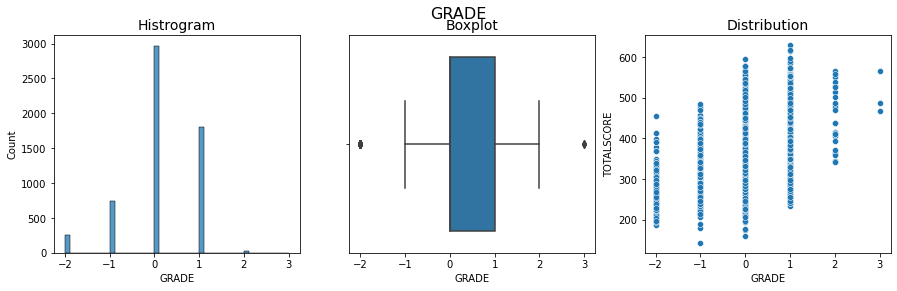

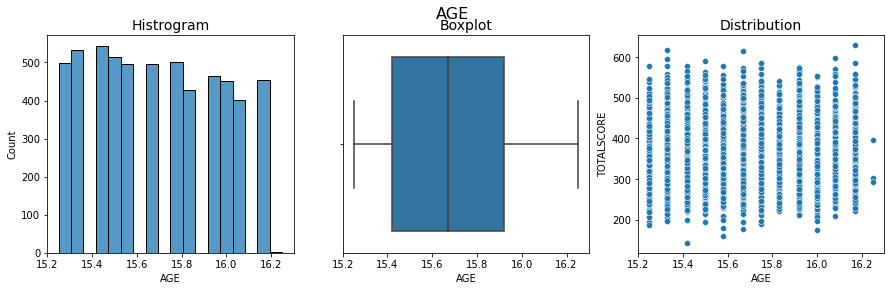

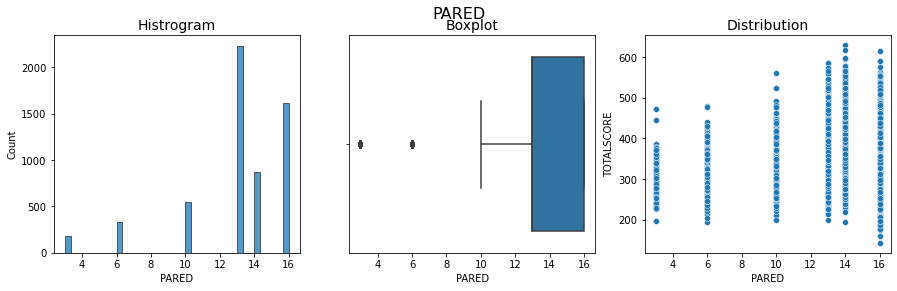

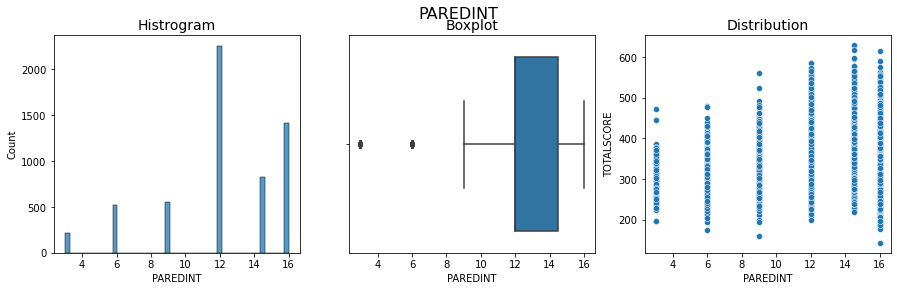

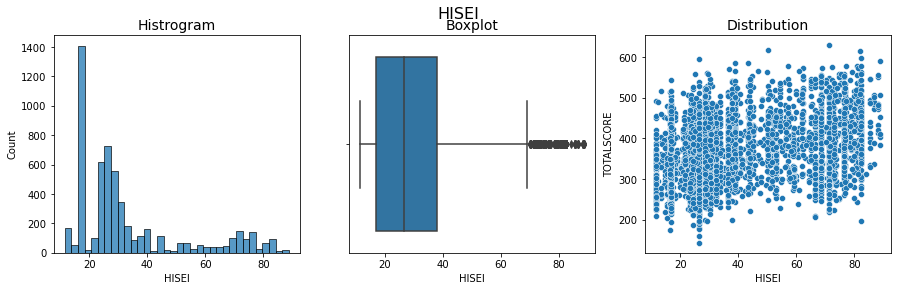

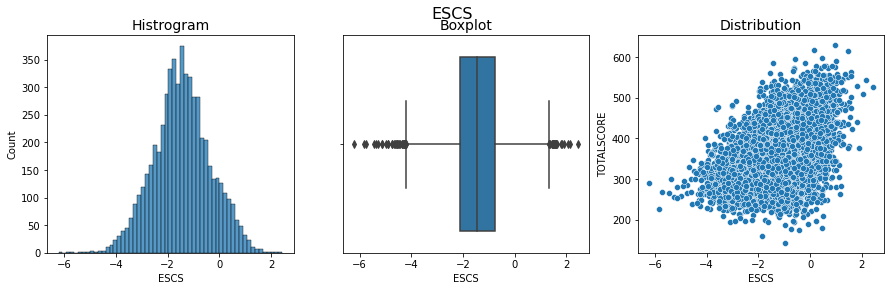

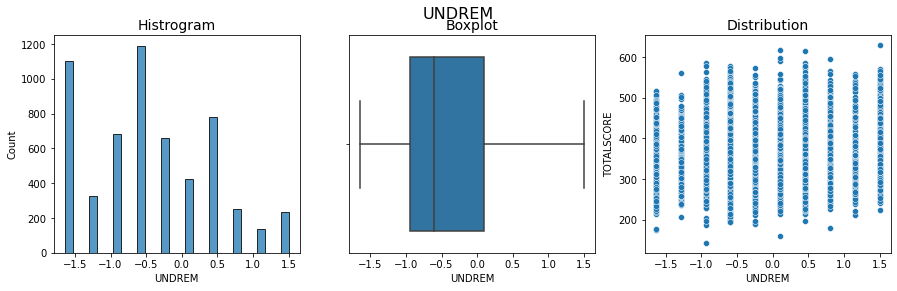

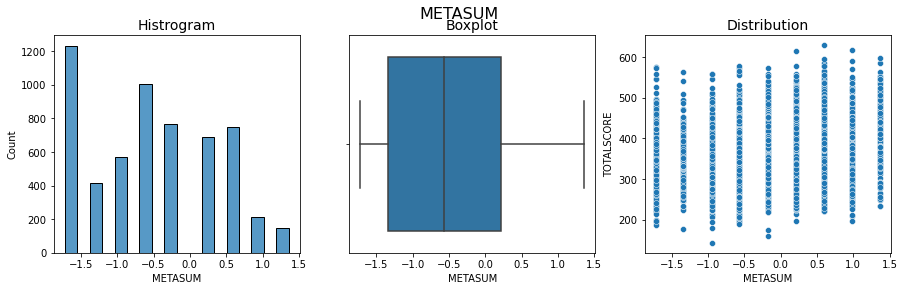

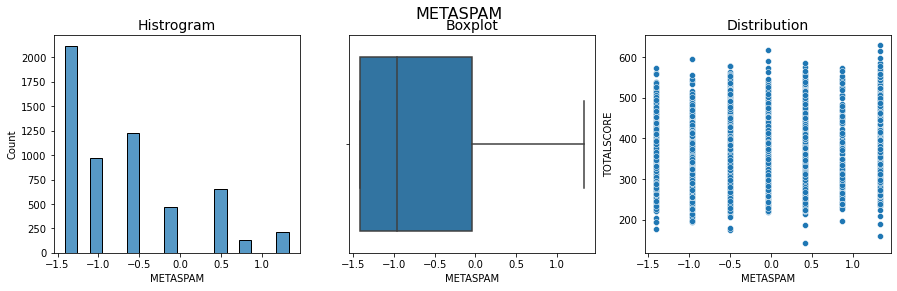

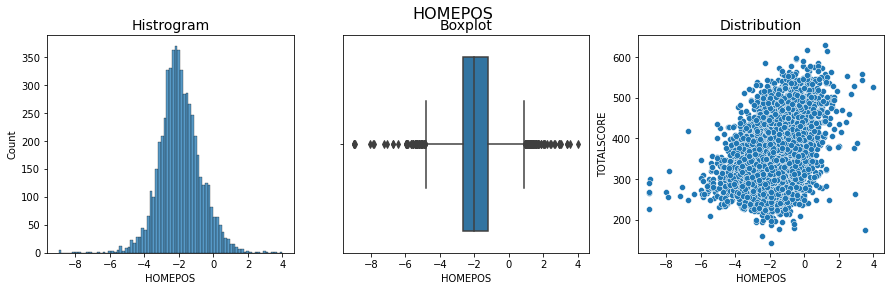

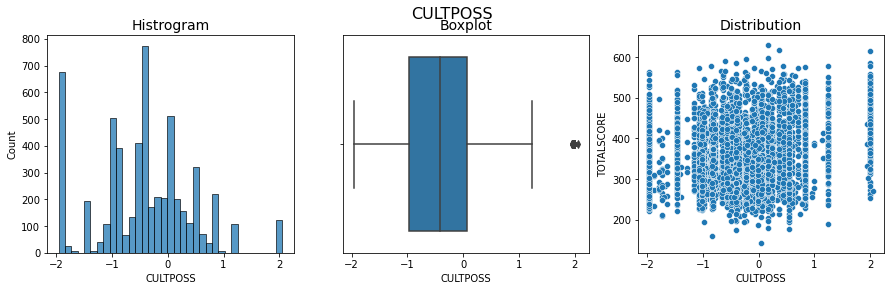

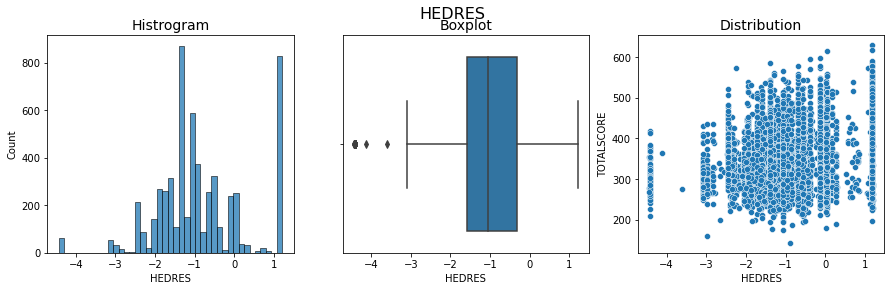

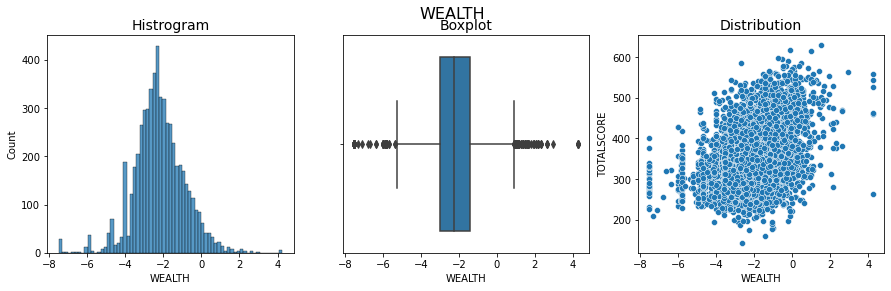

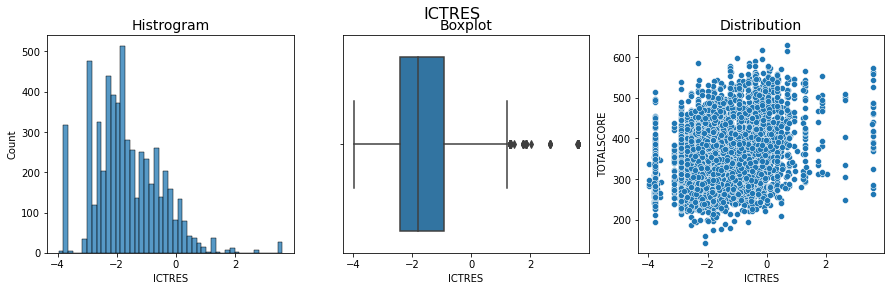

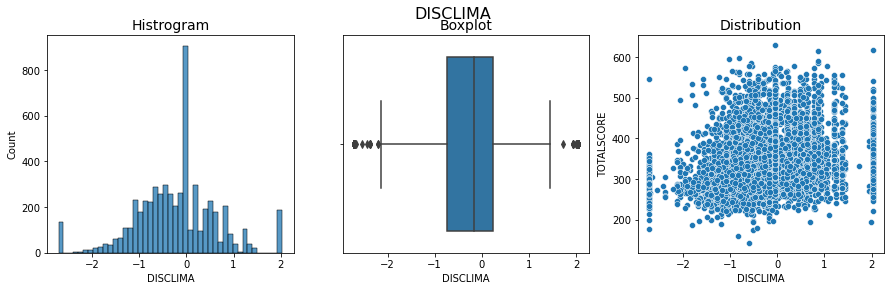

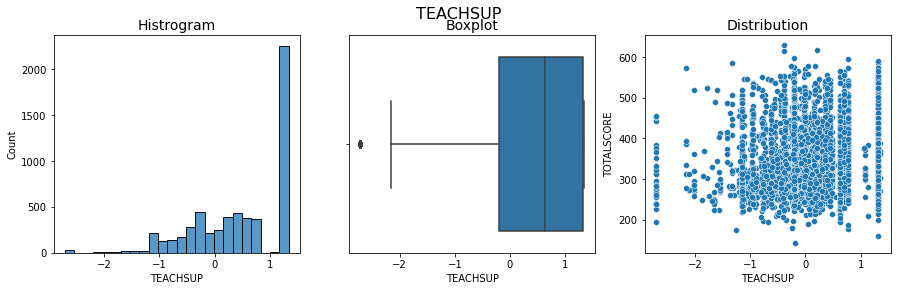

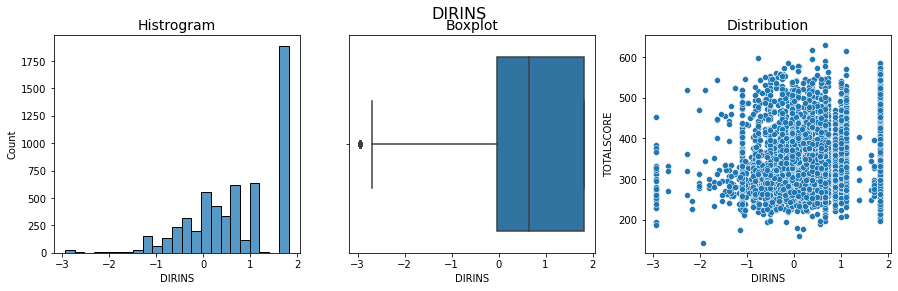

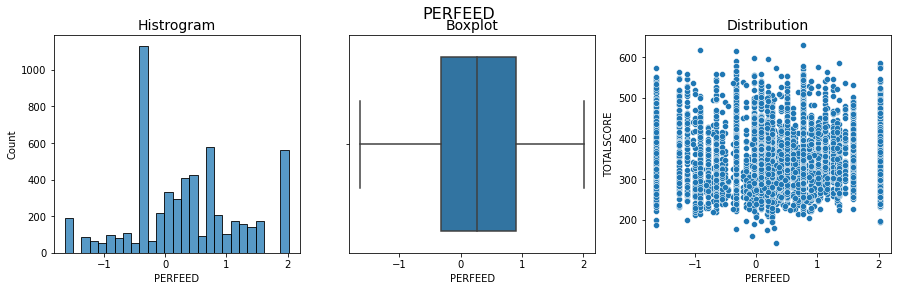

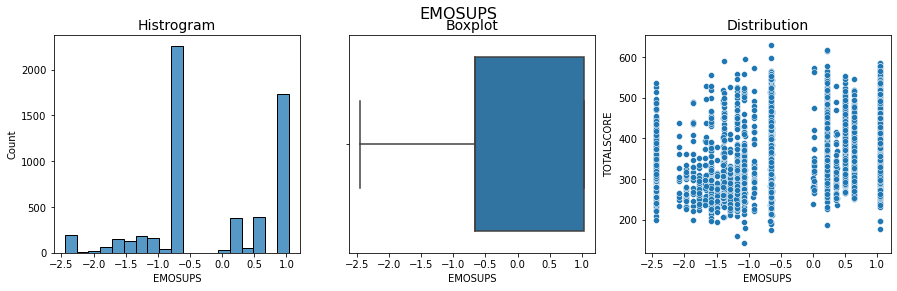

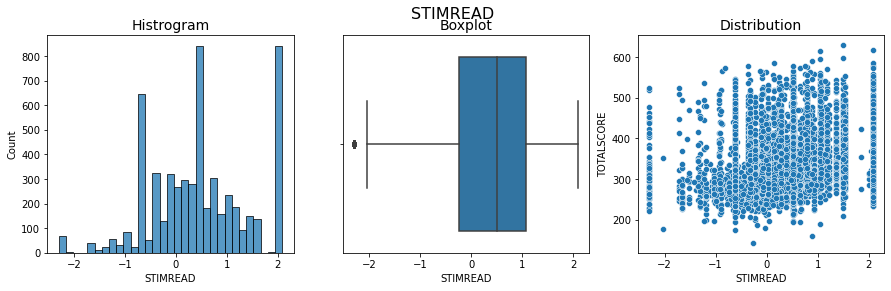

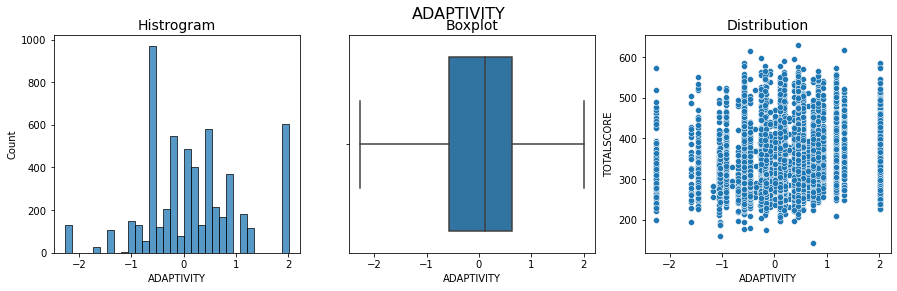

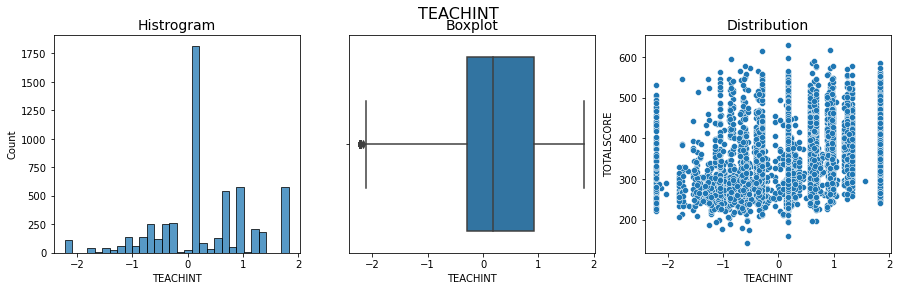

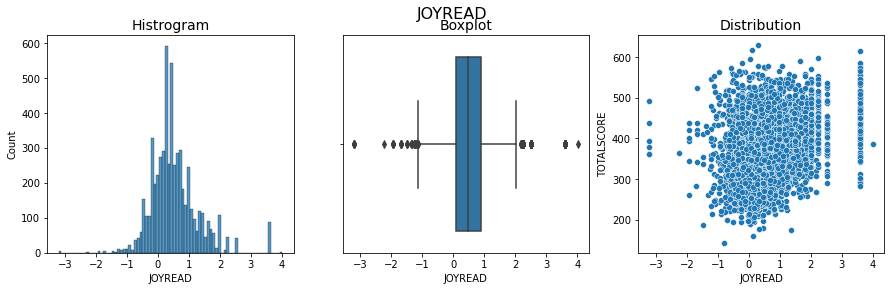

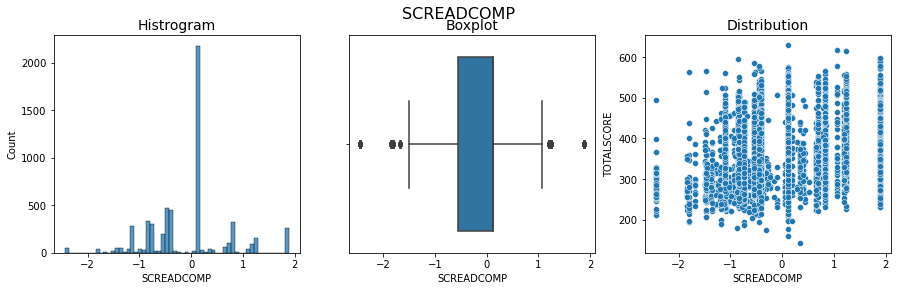

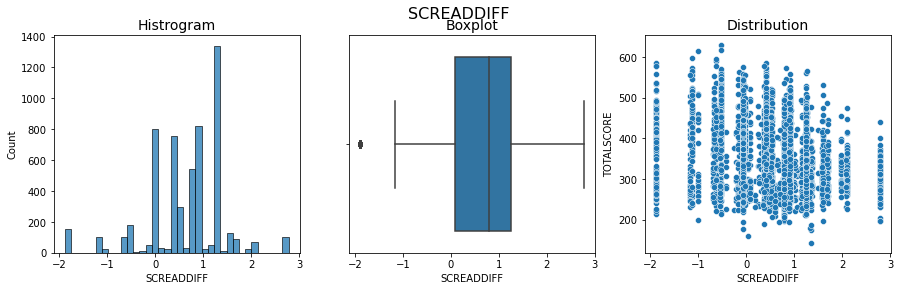

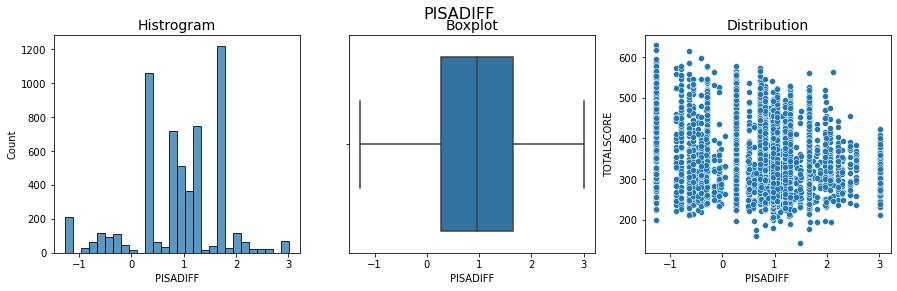

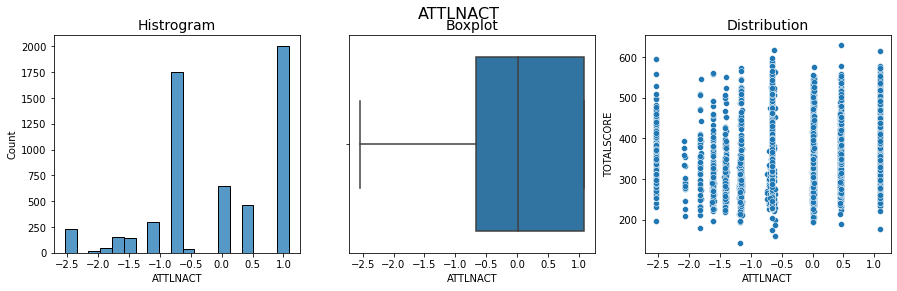

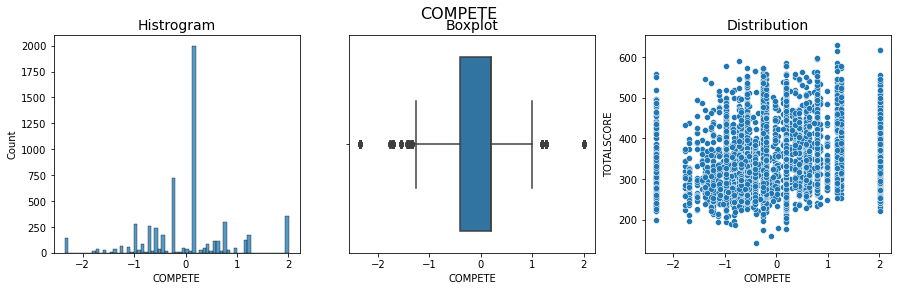

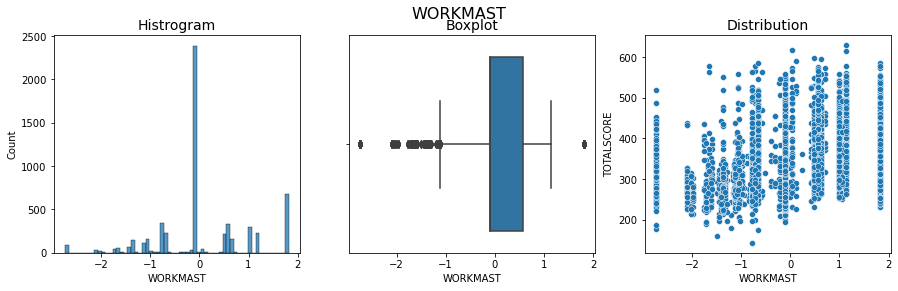

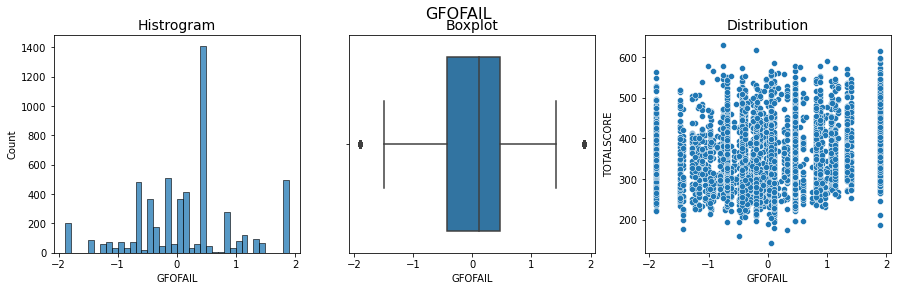

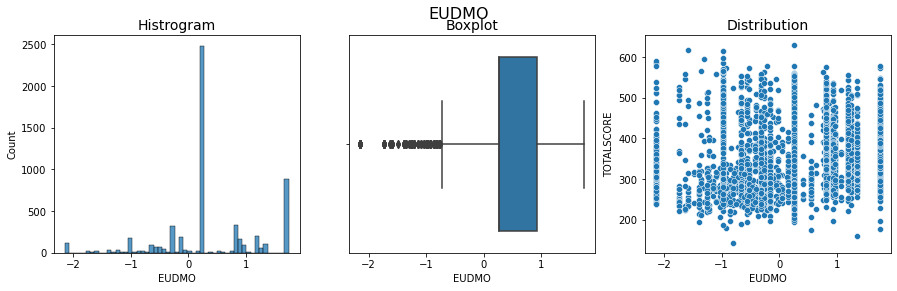

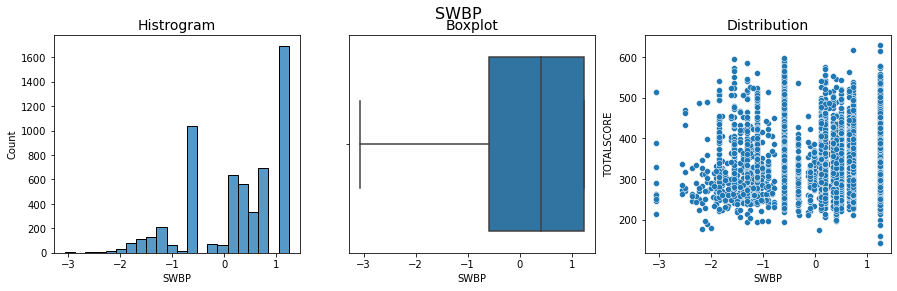

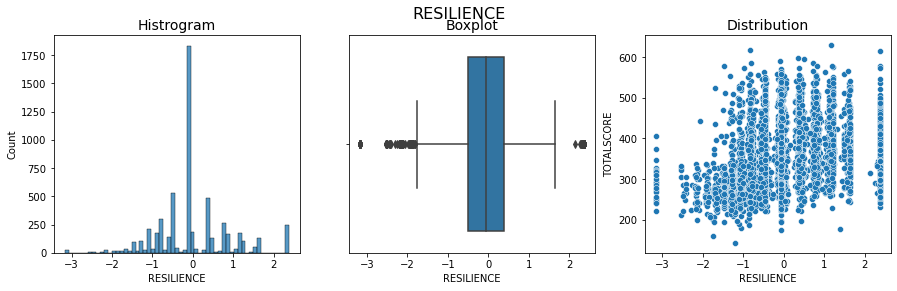

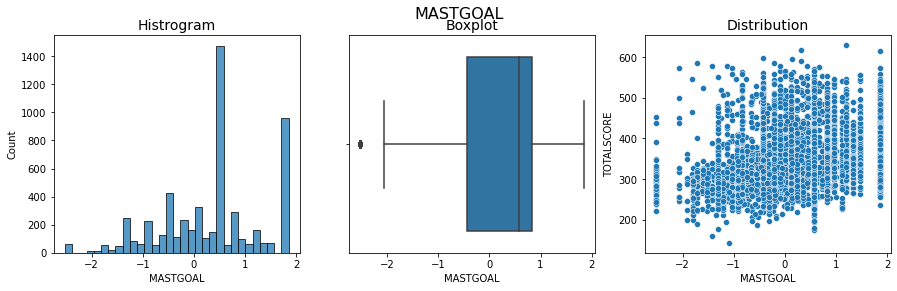

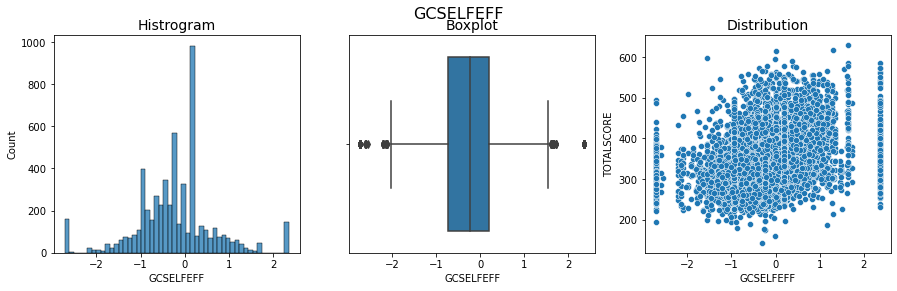

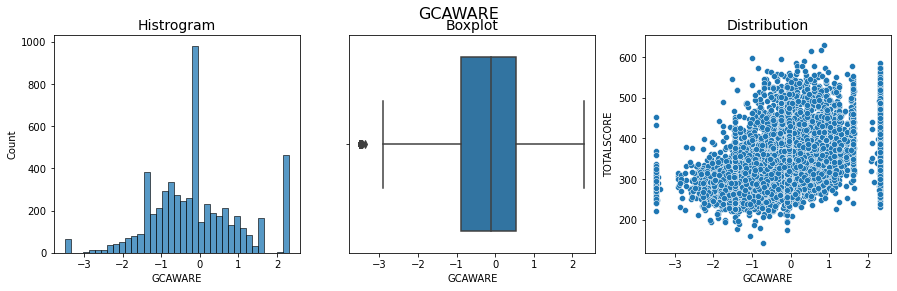

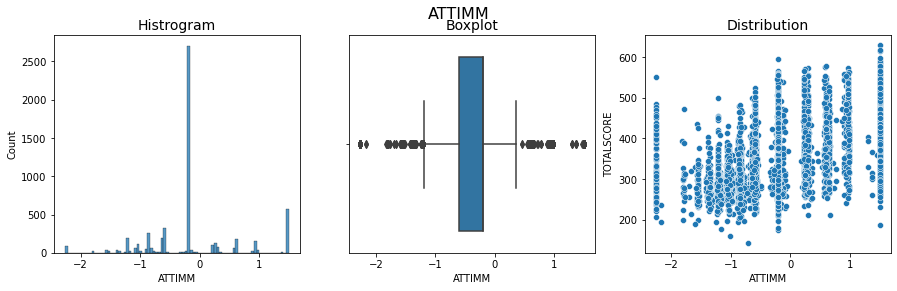

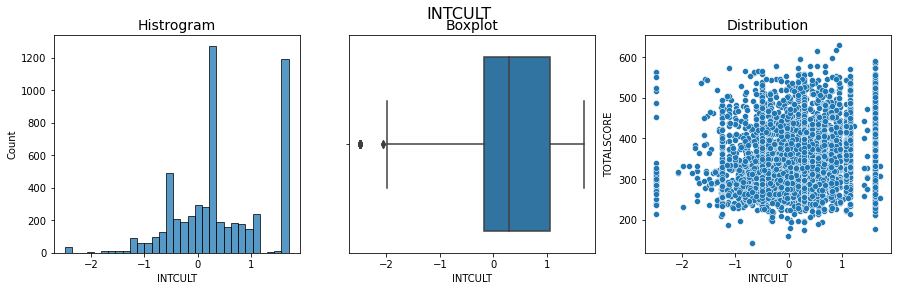

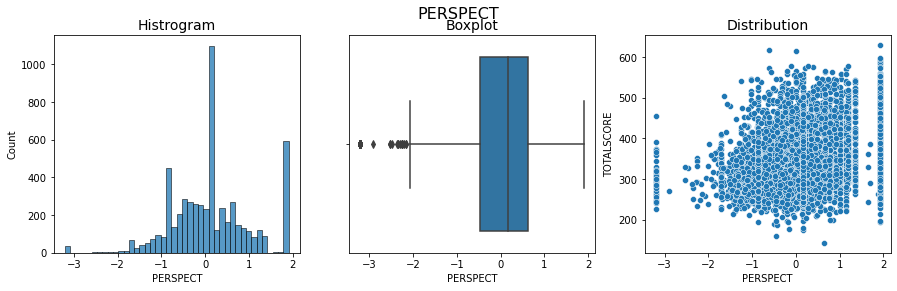

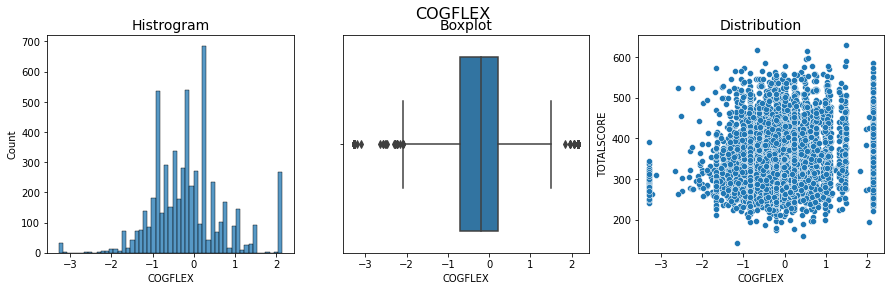

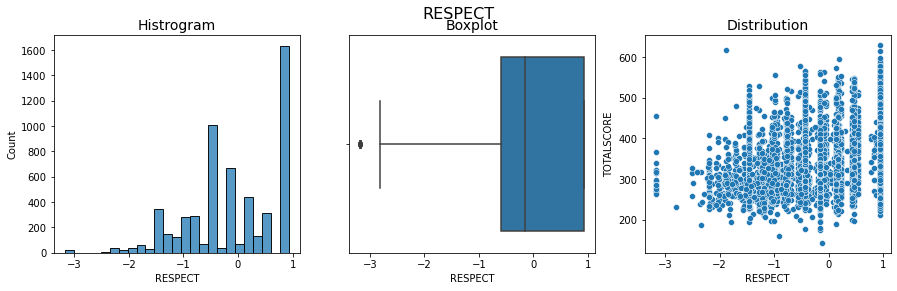

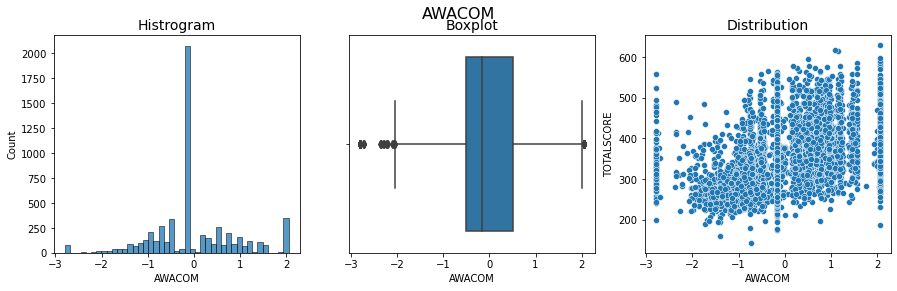

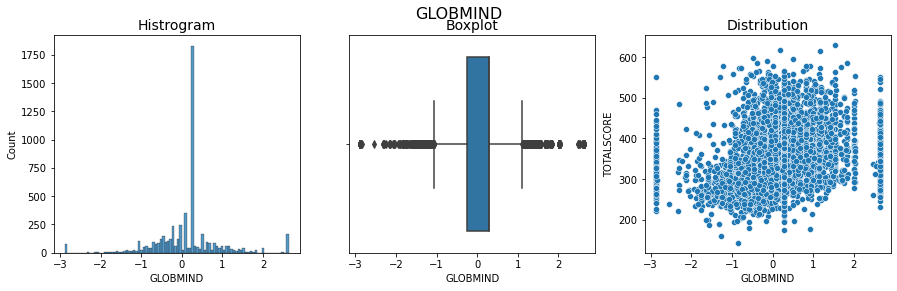

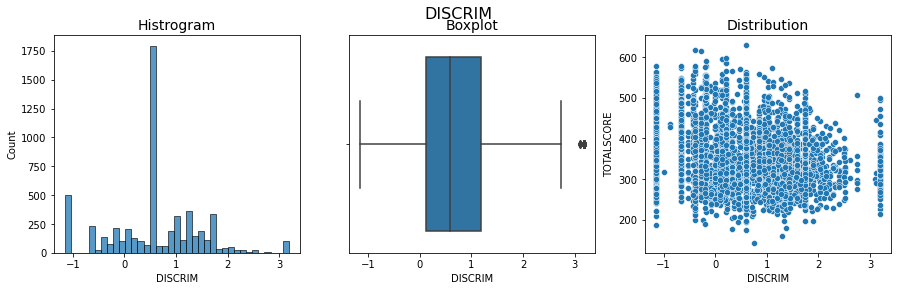

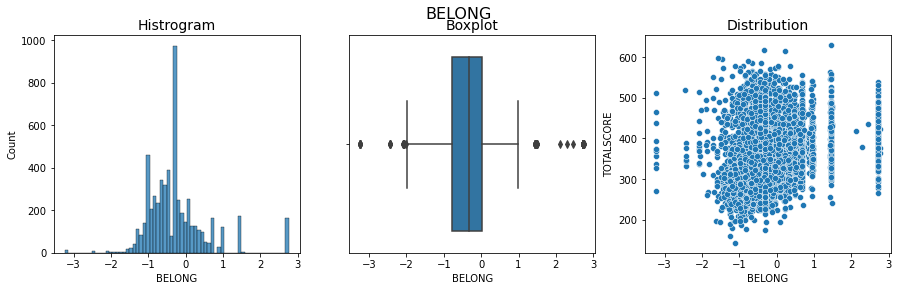

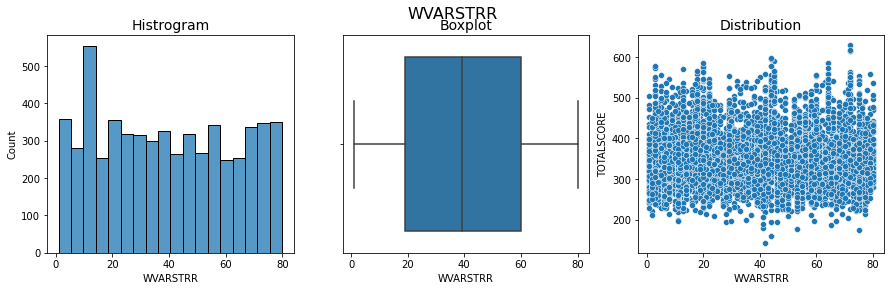

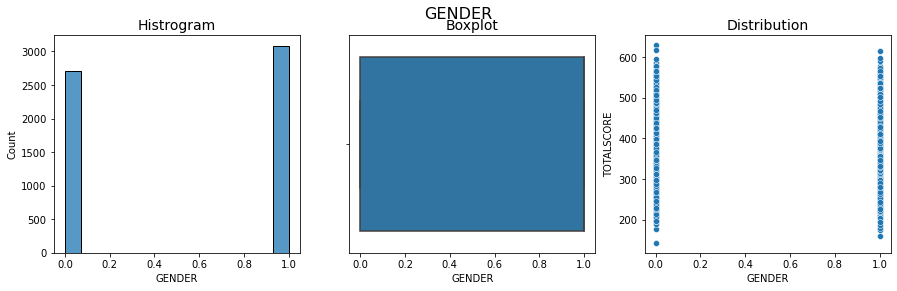

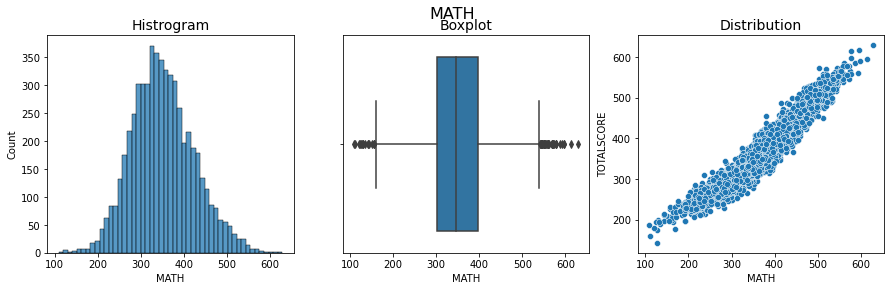

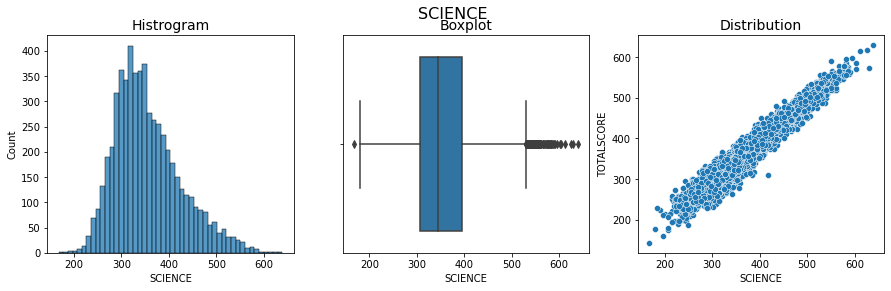

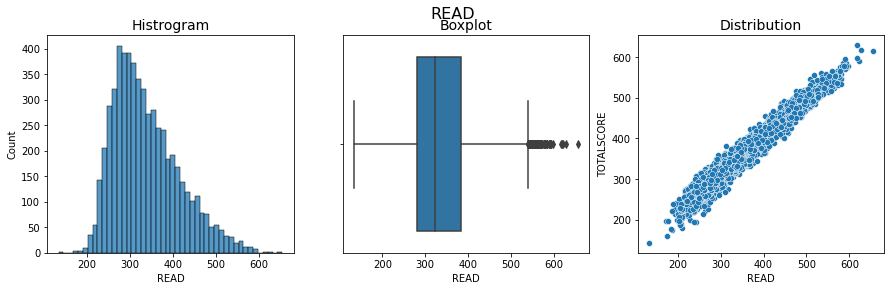

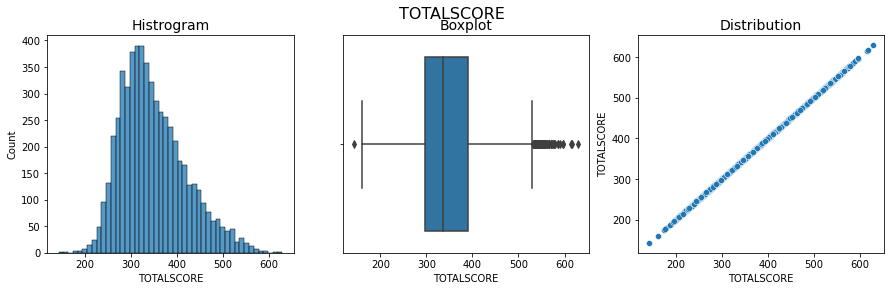

In [20]:
numvar = train_philippines.dtypes !="object"
numeric_features = list(numvar[numvar].index)
for col in numeric_features:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    ax = ax.ravel() 
    fig.suptitle(f"{col}\n", fontsize=16)
    ax[0].set_title(f'Histrogram', fontsize =14)
    sns.histplot(train_philippines[col], ax=ax[0])
    ax[1].set_title(f'Boxplot', fontsize =14)
    sns.boxplot(x=train_philippines[col], ax=ax[1])
    ax[2].set_title(f'Distribution', fontsize =14)
    sns.scatterplot(x = train_philippines[col], y= train_philippines['TOTALSCORE'],ax=ax[2])
    plt.show()

In [21]:
#remove extreme outliers
train_philippines = train_philippines[(train_philippines['PARED'] >4)]
train_philippines = train_philippines[(train_philippines['PAREDINT'] >4)]
train_philippines = train_philippines[(train_philippines['ESCS'] >= -3)]
train_philippines = train_philippines[(train_philippines['HOMEPOS'] > -5)]
train_philippines = train_philippines[(train_philippines['HOMEPOS'] < 4)]
train_philippines = train_philippines[(train_philippines['HEDRES'] > -4)]
train_philippines = train_philippines[(train_philippines['WEALTH'] > -4)]
train_philippines = train_philippines[(train_philippines['ICTRES'] > -4)]
train_philippines = train_philippines[(train_philippines['WORKMAST'] > -3)]

In [22]:
#remove extreme outliers
test_philippines = test_philippines[(test_philippines['PARED'] >4)]
test_philippines = test_philippines[(test_philippines['PAREDINT'] >4)]
test_philippines = test_philippines[(test_philippines['ESCS'] >= -3)]
test_philippines = test_philippines[(test_philippines['HOMEPOS'] > -5)]
test_philippines = test_philippines[(test_philippines['HOMEPOS'] < 4)]
test_philippines = test_philippines[(test_philippines['HEDRES'] > -4)]
test_philippines = test_philippines[(test_philippines['WEALTH'] > -4)]
test_philippines = test_philippines[(test_philippines['ICTRES'] > -4)]
test_philippines = test_philippines[(test_philippines['WORKMAST'] > -3)]

In [23]:
train_philippines.shape, test_philippines.shape

((4999, 62), (1242, 62))

In [24]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = train_philippines.groupby(column).mean()['TOTALSCORE'].sort_values().index
        
        sns.boxplot(x = dataframe[column],y = dataframe['TOTALSCORE'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f'TOTALSCORE  vs {column}', fontsize =16)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

In [25]:
train_philippines['GENDER'] = train_philippines['GENDER'].astype('object')

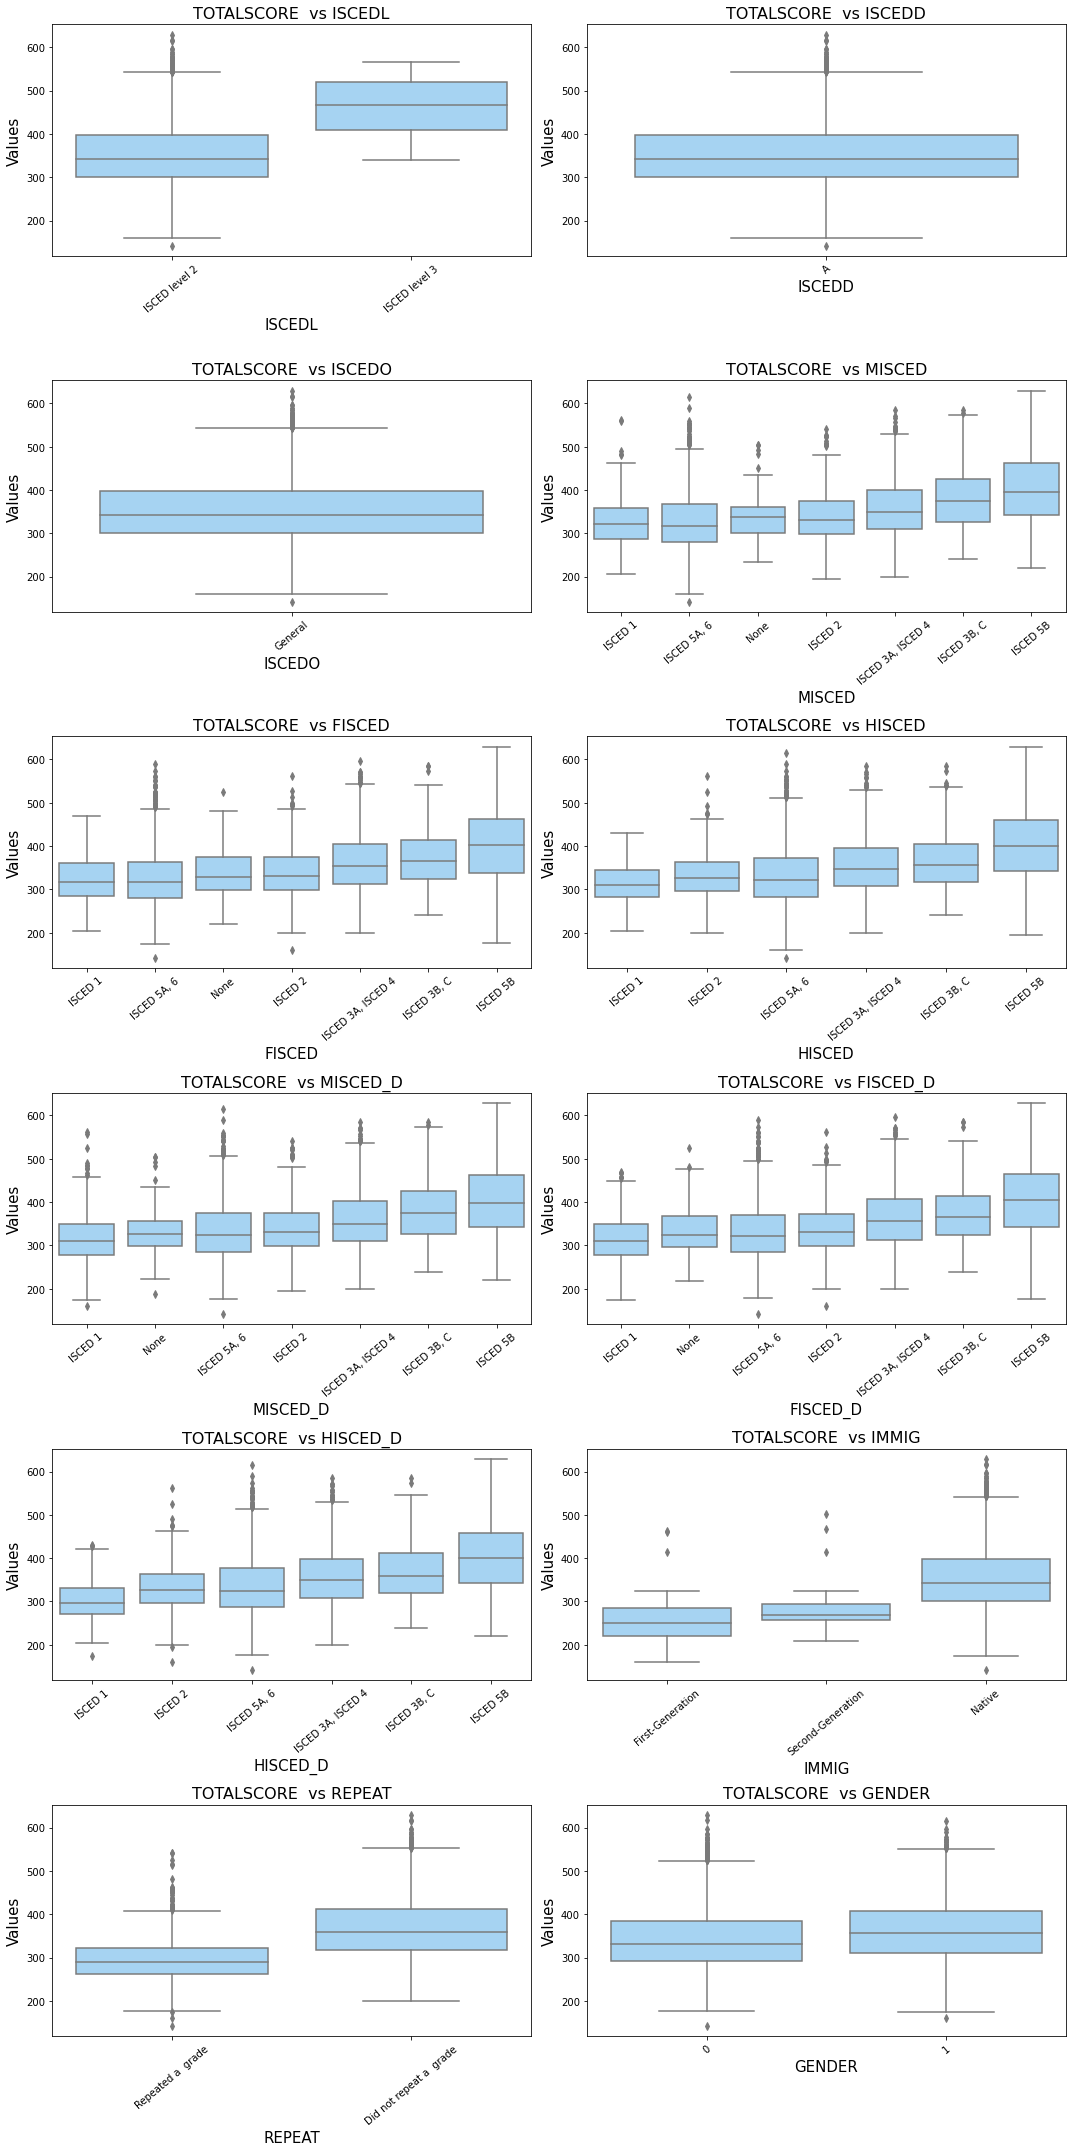

In [26]:
obvar = train_philippines.dtypes =="object"
categorical_features = list(obvar[obvar].index) 
subplot_boxplot(train_philippines, categorical_features)

In [27]:
train_philippines.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD','ISCEDO', 'PARED'], axis =1, inplace = True)
test_philippines.drop(columns=['MISCED_D', 'FISCED_D', 'HISCED_D', 'ISCEDD','ISCEDO', 'PARED'], axis =1, inplace = True)

In [28]:
# grouping values of categorical columns to reduce number of categories. 
train_philippines['Is_MISCED_5B'] = np.where(train_philippines['MISCED'] == 'ISCED 5B', 1, 0)
train_philippines['Is_FISCED_5B'] = np.where(train_philippines['FISCED'] == 'ISCED 5B', 1, 0)
train_philippines['Is_HISCED_5B'] = np.where(train_philippines['HISCED'] == 'ISCED 5B', 1, 0)

In [29]:
# grouping values of categorical columns to reduce number of categories. 
test_philippines['Is_MISCED_5B'] = np.where(test_philippines['MISCED'] == 'ISCED 5B', 1, 0)
test_philippines['Is_FISCED_5B'] = np.where(test_philippines['FISCED'] == 'ISCED 5B', 1, 0)
test_philippines['Is_HISCED_5B'] = np.where(test_philippines['HISCED'] == 'ISCED 5B', 1, 0)

In [30]:
#drop original columns
train_philippines.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)
test_philippines.drop(columns= ['MISCED', 'FISCED', 'HISCED'], axis =1, inplace =True)

In [31]:
train_philippines_cormatrix = train_philippines.drop(columns= ['MATH','SCIENCE','READ','TOTALSCORE',], axis =1)

<AxesSubplot:>

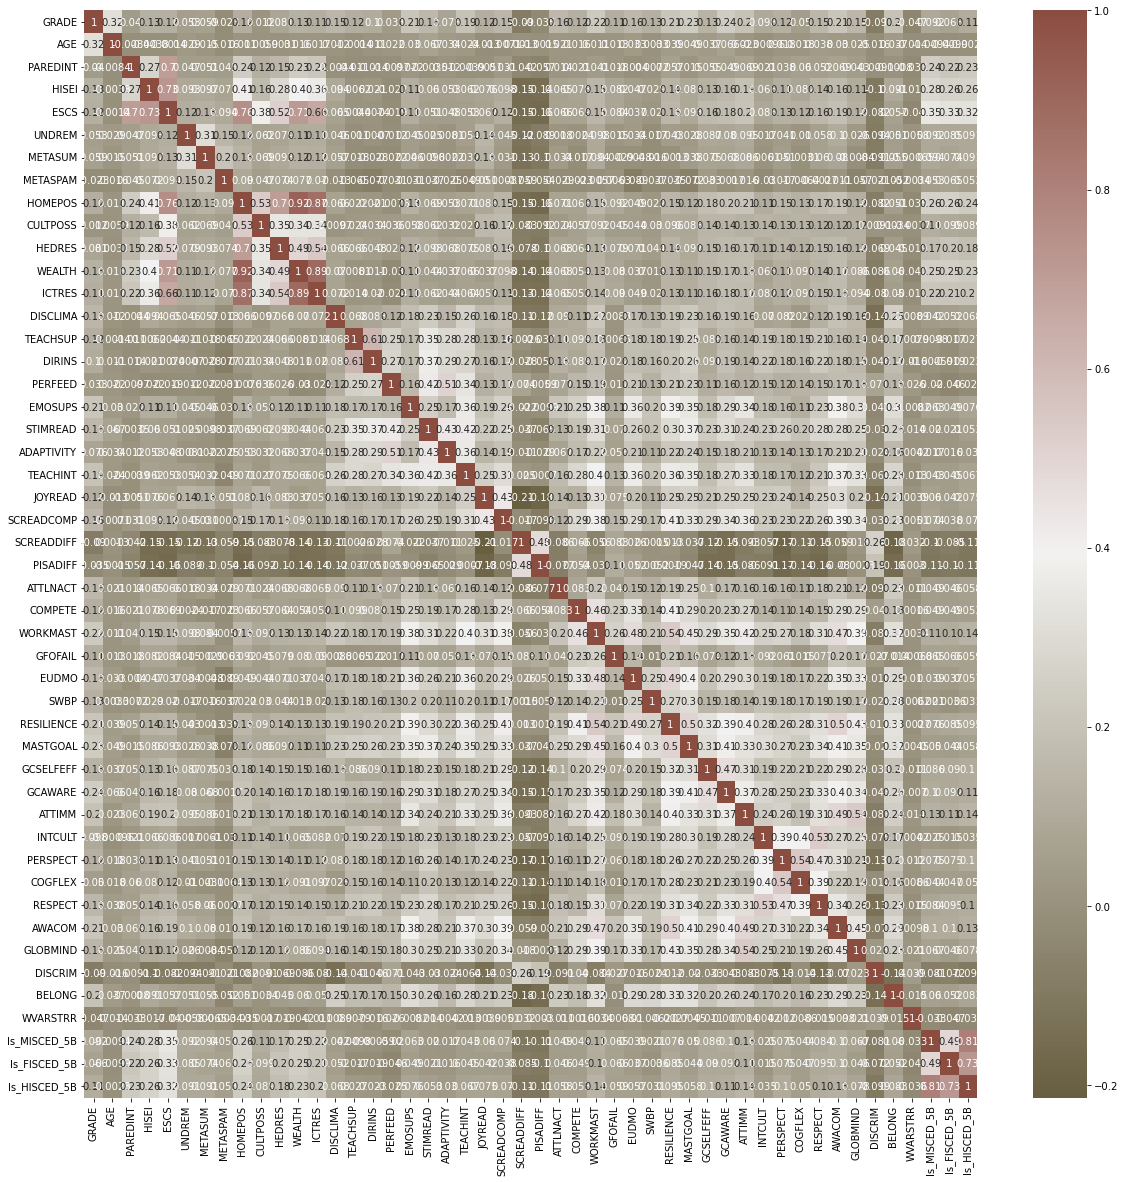

In [32]:
#Checking collinearity using correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= train_philippines_cormatrix.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cmap,annot=True)

In [33]:
# Drop columns with high correlation 
#Create correlation matrix
corr_matrix = train_philippines_cormatrix.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

['WEALTH', 'ICTRES']


In [34]:
# Drop features 
train_philippines.drop(to_drop, axis=1, inplace=True)
test_philippines.drop(to_drop, axis=1, inplace=True)
train_philippines.shape, test_philippines.shape

((4999, 54), (1242, 54))

In [35]:
#Exploring target variables

In [36]:
train_philippines[['MATH','READ', 'SCIENCE','TOTALSCORE']].describe().round(2)

MATH     READ  SCIENCE  TOTALSCORE
count  4999.00  4999.00  4999.00     4999.00
mean    357.03   344.98   360.97      354.33
std      72.81    77.93    71.27       71.69
min     109.13   133.68   167.43      142.59
25%     306.57   285.50   309.27      301.07
50%     352.75   330.48   348.93      343.13
75%     404.64   393.79   402.90      398.16
max     628.82   655.32   639.20      628.71

<Figure size 432x432 with 0 Axes>

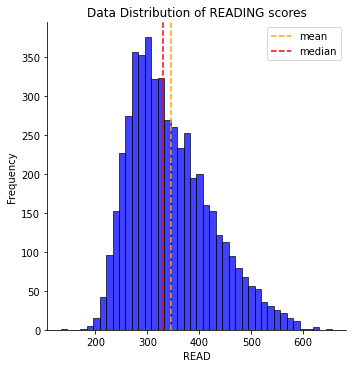

In [37]:
#checking Data Distribution of READING scores
plt.figure(figsize=(6,6))

sns.displot(train_philippines['READ'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of READING scores')

plt.axvline(train_philippines['READ'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_philippines['READ'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();


<Figure size 432x432 with 0 Axes>

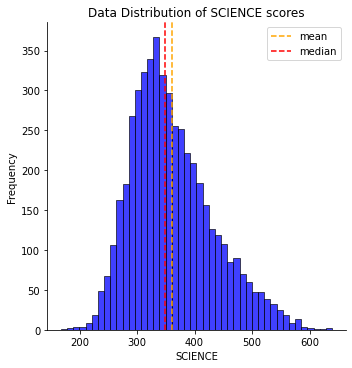

In [38]:
#checking Data Distribution of SCIENCE scores
plt.figure(figsize=(6,6))

sns.displot(train_philippines['SCIENCE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of SCIENCE scores')

plt.axvline(train_philippines['SCIENCE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_philippines['SCIENCE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

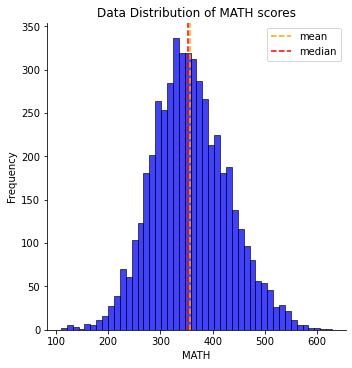

In [39]:
#checking Data Distribution of MATH scores
plt.figure(figsize=(6,6))

sns.displot(train_philippines['MATH'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of MATH scores')

plt.axvline(train_philippines['MATH'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_philippines['MATH'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

<Figure size 432x432 with 0 Axes>

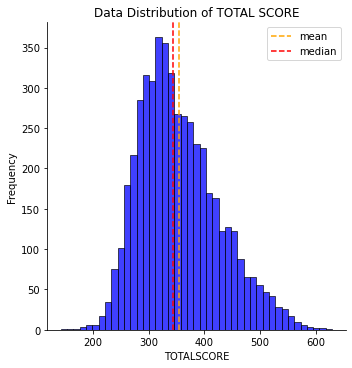

In [40]:
#checking Data Distribution of TOTAL scores
plt.figure(figsize=(6,6))

sns.displot(train_philippines['TOTALSCORE'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of TOTAL SCORE')

plt.axvline(train_philippines['TOTALSCORE'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(train_philippines['TOTALSCORE'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

In [41]:
#Exploring features with high correlation wiht target variable

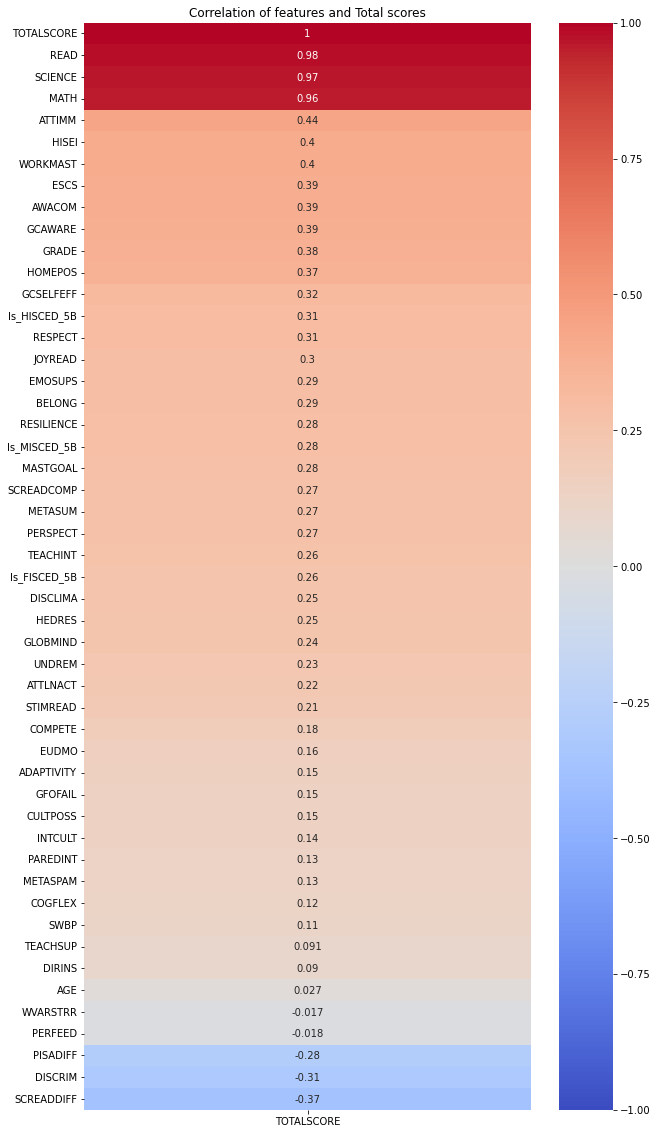

In [42]:
plt.figure(figsize = (10,20))
sns.heatmap(train_philippines.corr()[['TOTALSCORE']].sort_values(by = 'TOTALSCORE', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of features and Total scores')

plt.yticks(rotation =0)
plt.show()

In [45]:
selectd_features = (train_philippines.corr()[['TOTALSCORE']] > 0.25) | (train_philippines.corr()[['TOTALSCORE']] <= -0.25)
selectd_features[selectd_features['TOTALSCORE']==True].index.values

array(['GRADE', 'HISEI', 'ESCS', 'METASUM', 'HOMEPOS', 'DISCLIMA',
       'EMOSUPS', 'TEACHINT', 'JOYREAD', 'SCREADCOMP', 'SCREADDIFF',
       'PISADIFF', 'WORKMAST', 'RESILIENCE', 'MASTGOAL', 'GCSELFEFF',
       'GCAWARE', 'ATTIMM', 'PERSPECT', 'RESPECT', 'AWACOM', 'DISCRIM',
       'BELONG', 'MATH', 'SCIENCE', 'READ', 'TOTALSCORE', 'Is_MISCED_5B',
       'Is_FISCED_5B', 'Is_HISCED_5B'], dtype=object)

In [48]:
train_philippines.to_csv('train_pisa2018_philippines.csv')
test_philippines.to_csv('test_pisa2018_philippines.csv')

In [49]:
obvar = train_philippines.dtypes =="object"
categorical_features = list(obvar[obvar].index) 
categorical_features

['ISCEDL', 'IMMIG', 'REPEAT', 'GENDER']

In [51]:
#Assemble our X and y variables
X_train =train_philippines[['GRADE', 'HISEI', 'ESCS', 'METASUM', 'HOMEPOS', 'DISCLIMA',
       'EMOSUPS', 'TEACHINT', 'JOYREAD', 'SCREADCOMP', 'SCREADDIFF',
       'PISADIFF', 'WORKMAST', 'RESILIENCE', 'MASTGOAL', 'GCSELFEFF',
       'GCAWARE', 'ATTIMM', 'PERSPECT', 'RESPECT', 'AWACOM', 'DISCRIM',
       'BELONG', 'Is_MISCED_5B', 'Is_FISCED_5B', 'Is_HISCED_5B', 'ISCEDL', 'IMMIG', 'REPEAT', 'GENDER']]
X_train = pd.get_dummies(columns=[ 'Is_MISCED_5B', 'Is_FISCED_5B', 'Is_HISCED_5B', 'ISCEDL', 'IMMIG', 'REPEAT', 'GENDER'], 
                         drop_first =True, data =X_train)
y_train = train_philippines['TOTALSCORE']

X_test =test_philippines[['GRADE', 'HISEI', 'ESCS', 'METASUM', 'HOMEPOS', 'DISCLIMA',
       'EMOSUPS', 'TEACHINT', 'JOYREAD', 'SCREADCOMP', 'SCREADDIFF',
       'PISADIFF', 'WORKMAST', 'RESILIENCE', 'MASTGOAL', 'GCSELFEFF',
       'GCAWARE', 'ATTIMM', 'PERSPECT', 'RESPECT', 'AWACOM', 'DISCRIM',
       'BELONG', 'Is_MISCED_5B', 'Is_FISCED_5B', 'Is_HISCED_5B', 'ISCEDL', 'IMMIG', 'REPEAT', 'GENDER']]
X_test = pd.get_dummies(columns=[ 'Is_MISCED_5B', 'Is_FISCED_5B', 'Is_HISCED_5B', 'ISCEDL', 'IMMIG', 'REPEAT', 'GENDER'], 
                         drop_first =True, data =X_test)
y_test = test_philippines['TOTALSCORE']

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [52]:
from sklearn.dummy import DummyRegressor
baseline_model = DummyRegressor()
baseline_model.fit(X_train, y_train)
baseline_preds = baseline_model.predict(X_test)
# Test Score
baseline_model.score(X_test, y_test)
print(f'Test R-squared Score: {baseline_model.score(X_test, y_test)}')
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, baseline_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, baseline_preds, squared = False)}' )

Test R-squared Score: -0.0007577114139447616
MSE is : 4849.729825602095
RMSE is : 69.64000161977378


In [53]:
#scaler = StandardScaler()  #scaler object
#X_train_sc = scaler.fit_transform(X_train)  #scaling training set
#X_test_sc = scaler.transform(X_test)  #scaling test set


lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Score
lr.score(X_train, y_train)
print(f'Train R-squared Score: {lr.score(X_train, y_train)}')
print()

# Test Score
lr.score(X_test, y_test)
print(f'Test R-squared Score: {lr.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(lr, X_train, y_train, cv =5)
print(f' Cross Val Score :{cross_val_score(lr, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = lr.predict(X_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

Train R-squared Score: 0.5938051843748806

Test R-squared Score: 0.5575453028984819
 Cross Val Score :[0.56722898 0.56714307 0.59681326 0.58473621 0.61893542]

MSE is : 2144.1610856830143
RMSE is : 46.30508703893142


In [ ]:
lr.intercept_

In [54]:
pd.Series(lr.coef_, index = X_train.columns).sort_values(ascending=False)

ISCEDL_ISCED level 3        44.820537
IMMIG_Native                40.554600
IMMIG_Second-Generation     27.973601
ATTIMM                      13.778577
Is_HISCED_5B_1              13.105304
METASUM                     10.929722
GRADE                       10.630466
HOMEPOS                      8.026739
WORKMAST                     6.951012
Is_FISCED_5B_1               5.649344
AWACOM                       4.597335
GCAWARE                      4.529840
Is_MISCED_5B_1               4.453456
GCSELFEFF                    4.419800
DISCLIMA                     3.927807
JOYREAD                      3.496898
EMOSUPS                      2.418149
BELONG                       1.584780
TEACHINT                     1.560231
RESPECT                      0.899774
PERSPECT                     0.654153
SCREADCOMP                   0.651330
HISEI                        0.614365
MASTGOAL                    -1.135783
ESCS                        -2.961197
PISADIFF                    -3.043191
RESILIENCE  

In [55]:
scaler = StandardScaler()  #scaler object
X_train_sc = scaler.fit_transform(X_train)  #scaling training set
X_test_sc = scaler.transform(X_test)  #scaling test set

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_preds = lr.predict(X_test_sc)

In [56]:
# coefficient dataframe
lr_coef = pd.DataFrame(data=[lr.coef_],columns=X_train.columns).T.sort_values(by=0,ascending=False)

# Label the color the each coefficient
color = ['red' if x < 0 else 'blue' for x in lr_coef[0]]

# Assign the color_list to new column
lr_coef['color'] = color

lr_coef.head()

0 color
HISEI    12.191722  blue
ATTIMM   10.862744  blue
METASUM   9.664152  blue
HOMEPOS   8.342752  blue
GRADE     8.098478  blue

In [57]:
# Select the highest values whether negative or positive
abs(lr_coef[0]).sort_values(ascending=False)[:10].index

Index(['HISEI', 'SCREADDIFF', 'DISCRIM', 'ATTIMM', 'REPEAT_Repeated a  grade',
       'METASUM', 'HOMEPOS', 'GRADE', 'WORKMAST', 'GCAWARE'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 highest coefficient')

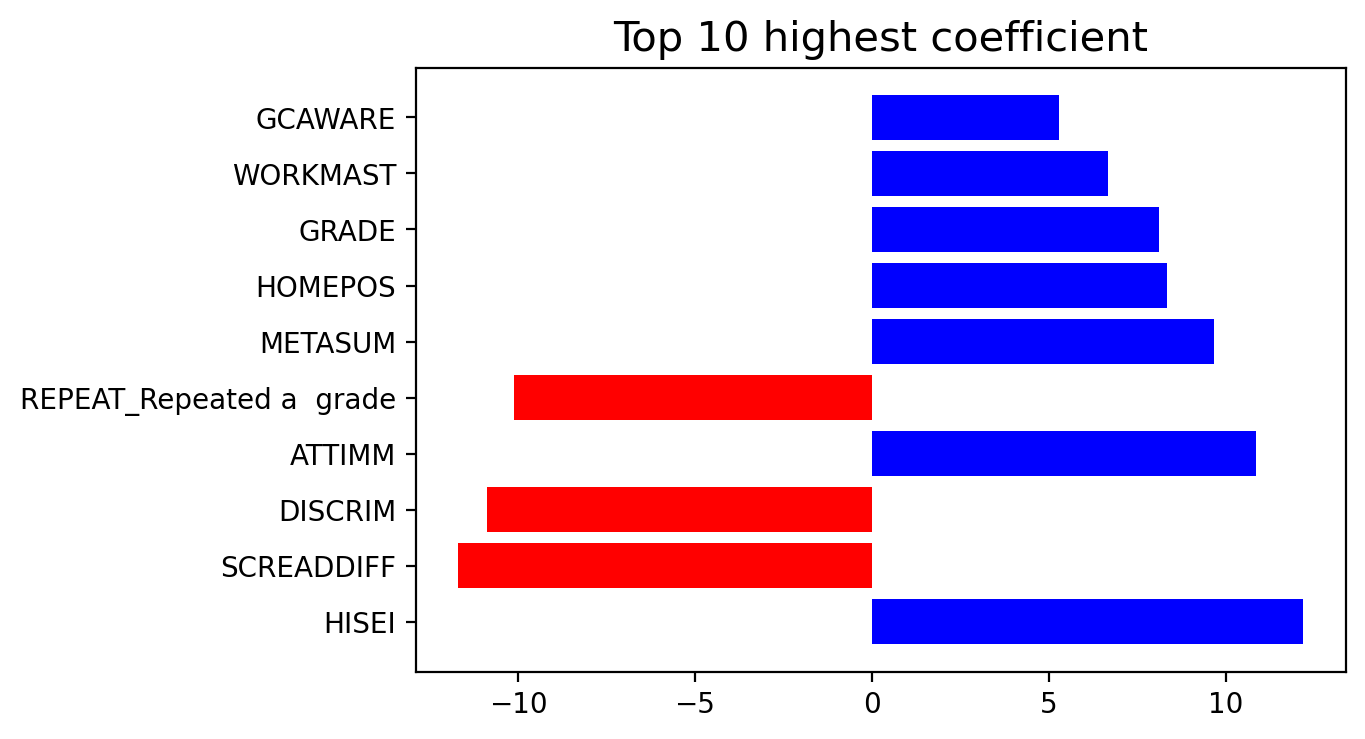

In [59]:
# Plot the coefficient of top 10 highest coefficient 
plt.figure(dpi=200)
plt.barh(lr_coef.loc[['HISEI', 'SCREADDIFF', 'DISCRIM', 'ATTIMM', 'REPEAT_Repeated a  grade',
       'METASUM', 'HOMEPOS', 'GRADE', 'WORKMAST', 'GCAWARE']].
         index,lr_coef.loc[['HISEI', 'SCREADDIFF', 'DISCRIM', 'ATTIMM', 'REPEAT_Repeated a  grade',
       'METASUM', 'HOMEPOS', 'GRADE', 'WORKMAST', 'GCAWARE']][0],
         color=lr_coef.loc[['HISEI', 'SCREADDIFF', 'DISCRIM', 'ATTIMM', 'REPEAT_Repeated a  grade',
       'METASUM', 'HOMEPOS', 'GRADE', 'WORKMAST', 'GCAWARE']]['color'])
plt.title('Top 10 highest coefficient',size=15)

In [60]:
#RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 4, random_state = 0).fit(X_train, y_train)
# Train Score
RFReg.score(X_train, y_train)
print(f'RFReg Train R-squared Score: {RFReg.score(X_train, y_train)}')
print()

# Test Score
RFReg.score(X_test, y_test)
print(f'RFReg Test R-squared Score: {RFReg.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(RFReg, X_train, y_train, cv =5)
print(f'RFReg Cross Val Score :{cross_val_score(RFReg, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = RFReg.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

RFReg Train R-squared Score: 0.5770584089629918

RFReg Test R-squared Score: 0.5137793783763542
RFReg Cross Val Score :[0.54345323 0.52167125 0.53864902 0.51922719 0.58316108]

RFReg MSE is : 2356.253290498629
RFReg RMSE is : 48.54125349121744


In [61]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2,3,4],
}
regr = RandomForestRegressor(random_state=42)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [62]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [63]:
clf.score(X_train, y_train)

0.5754447603548152

In [64]:
# Making prediction
y_preds_clf = clf.predict(X_test)

#evaluate models with matrics
print(f'RFReg MSE is : {mean_squared_error(y_test, y_preds_clf)}' )
print(f'RFReg RMSE is : {mean_squared_error(y_test, y_preds_clf, squared = False)}' )

RFReg MSE is : 2359.331607649247
RFReg RMSE is : 48.572951399407955


In [65]:
clf.best_estimator_

RandomForestRegressor(max_depth=4, random_state=42)

In [66]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  mean_test_score
10  {'max_depth': 4, 'n_estimators': 100}               4         0.541128
11  {'max_depth': 4, 'n_estimators': 150}               4         0.540410
12  {'max_depth': 4, 'n_estimators': 200}               4         0.540335
14  {'max_depth': 4, 'n_estimators': 300}               4         0.540228
13  {'max_depth': 4, 'n_estimators': 250}               4         0.540055

In [67]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

#SVM
SVM = svm.SVR().fit(X_train_sc, y_train)
# Train Score
SVM.score(X_train_sc, y_train)
print(f'SVM Train R-squared Score: {SVM.score(X_train_sc, y_train)}')
print()

# Test Score
SVM.score(X_test_sc, y_test)
print(f'SVM Test R-squared Score: {SVM.score(X_test_sc, y_test)}')

# Cross Val Score
cross_val_score(SVM, X_train_sc, y_train, cv =5)
print(f'SVM Cross Val Score :{cross_val_score(SVM, X_train_sc, y_train, cv =5)}')
print()
# Making prediction
y_preds = SVM.predict(X_test_sc)

#evaluate SVMs with matrics
print(f'SVM MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'SVM RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

SVM Train R-squared Score: 0.5106128200783582

SVM Test R-squared Score: 0.4990662335474194
SVM Cross Val Score :[0.47335042 0.46538663 0.47063165 0.50471259 0.47701969]

SVM MSE is : 2427.5540424103715
SVM RMSE is : 49.27021455616336


In [68]:
#scaler = StandardScaler()

#X_train_sc = scaler.fit_transform(X_train)

#X_test_sc = scaler.transform(X_test)

#XGRegressor
XGReg = xg.XGBRegressor(objective ='reg:squarederror', max_depth = 3, seed = 1,verbosity=0).fit(X_train, y_train) 
# Train Score
XGReg.score(X_train, y_train)
print(f'XGReg Train R-squared Score: {XGReg.score(X_train, y_train)}')
print()

# Test Score
XGReg.score(X_test, y_test)
print(f'XGReg Test R-squared Score: {XGReg.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg, X_train, y_train, cv =5)
print(f'XGReg Cross Val Score :{cross_val_score(XGReg, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg.predict(X_test)

#evaluate models with matrics
print(f'XGReg MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

XGReg Train R-squared Score: 0.8005902930621217

XGReg Test R-squared Score: 0.6473596715185931
XGReg Cross Val Score :[0.65337061 0.64989066 0.65209908 0.64134358 0.67802914]

XGReg MSE is : 1708.9154540014351
XGReg RMSE is : 41.339030636934815


In [69]:
#scaling 
#XGReg Train R-squared Score: 0.8062091261552633

#XGReg Test R-squared Score: 0.7036807027713595
#XGReg Cross Val Score :[0.71167068 0.73181853 0.70530674 0.72293502 0.73317806]

#XGReg MSE is : 2121.8446899941187
#XGReg RMSE is : 46.063485430372275

In [70]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [2,3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[13:15:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.6831393704409174
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [71]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('rank_test_score').head(5)[['params','param_max_depth','mean_test_score']]

params param_max_depth  \
2  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               4   
3  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               5   
6  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               4   
5  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               3   
7  {'colsample_bytree': 0.7, 'learning_rate': 0.0...               5   

   mean_test_score  
2         0.683139  
3         0.681745  
6         0.679648  
5         0.678296  
7         0.675672

In [72]:
#XGRegressor
XGReg2 = xg.XGBRegressor(learning_rate = 0.03, max_depth = 4, min_child_weight = 4, n_estimators = 500, nthread = 4, \
                         objective = 'reg:linear', subsample = 0.7, seed = 1, verbosity=0).fit(X_train, y_train) 
# Train Score
XGReg2.score(X_train, y_train)
print(f'XGReg2 Train R-squared Score: {XGReg2.score(X_train, y_train)}')
print()

# Test Score
XGReg2.score(X_test, y_test)
print(f'XGReg2 Test R-squared Score: {XGReg2.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(XGReg2, X_train, y_train, cv =5)
print(f'XGReg2 Cross Val Score :{cross_val_score(XGReg2, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = XGReg2.predict(X_test)

#evaluate models with matrics
print(f'XGReg2 MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'XGReg2 RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}')

XGReg2 Train R-squared Score: 0.8200916623354437

XGReg2 Test R-squared Score: 0.665459319170586
XGReg2 Cross Val Score :[0.68016227 0.68218141 0.68552585 0.6782734  0.71472784]

XGReg2 MSE is : 1621.2035132892931
XGReg2 RMSE is : 40.264171583298385


 98%|===================| 4893/4999 [00:36<00:00]        

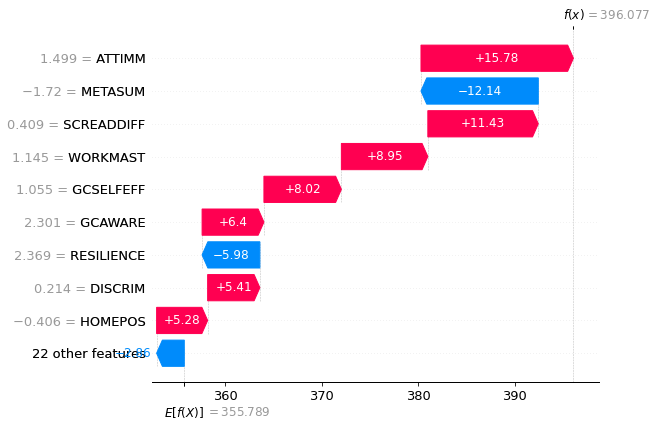

In [73]:
explainer = shap.Explainer(XGReg2, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[100])

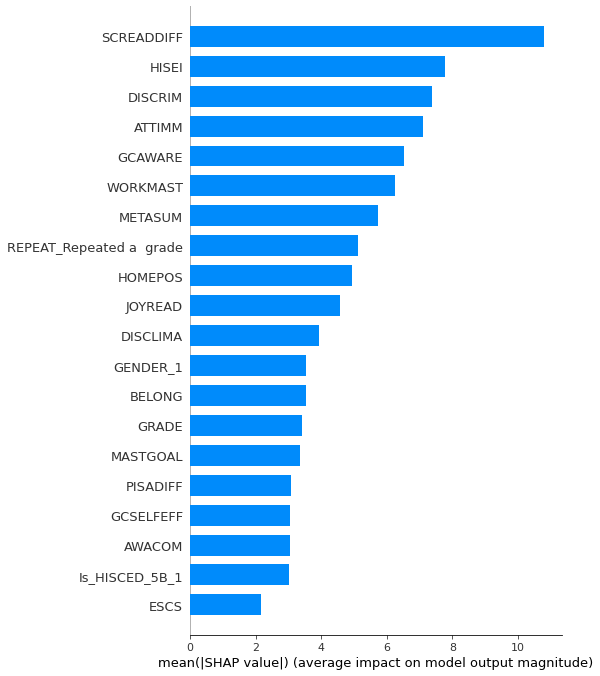

In [74]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

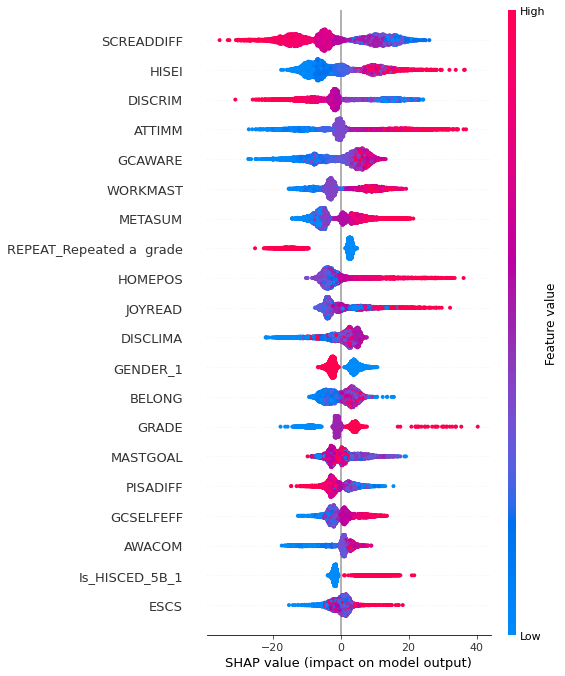

In [75]:
shap.summary_plot(shap_values, X_train)

C:\Users\science01\Anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1448: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\science01\Anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1197: UserWarning:

Attempting to set identical bottom == top == 354.3783264160156 results in singular transformations; automatically expanding.

C:\Users\science01\Anaconda3\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:1197: UserWarning:

Attempting to set identical bottom == top == 354.3783264160156 results in singular transformations; automatically expanding.



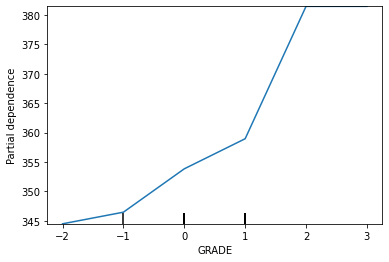

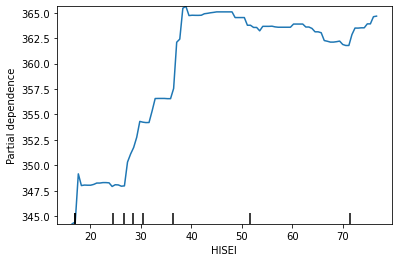

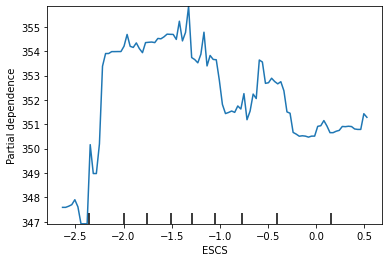

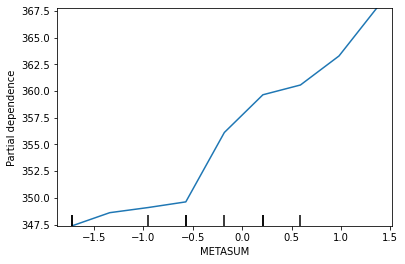

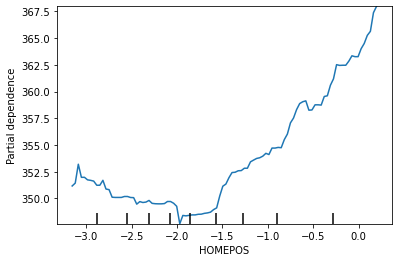

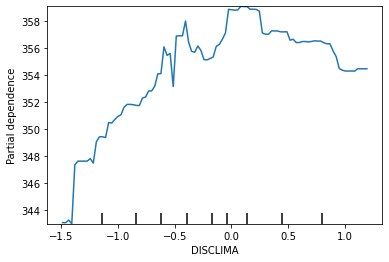

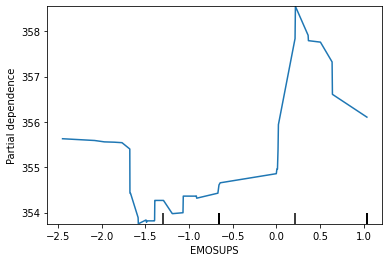

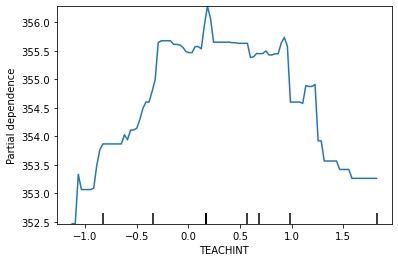

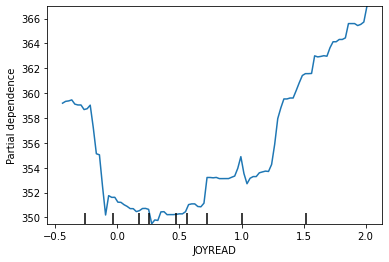

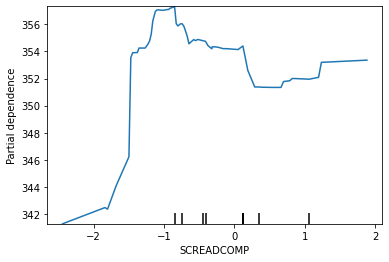

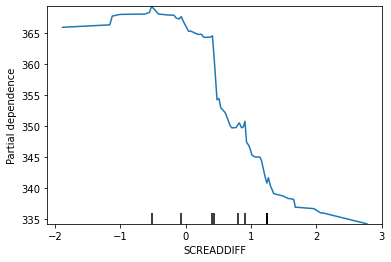

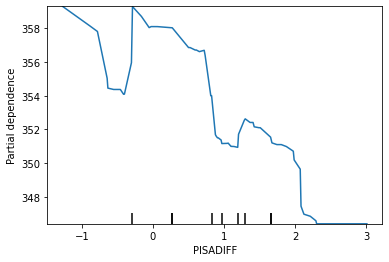

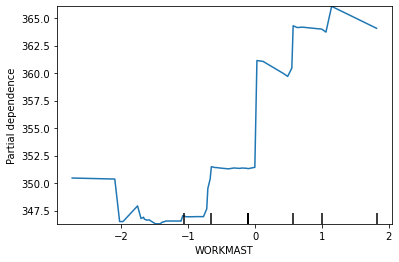

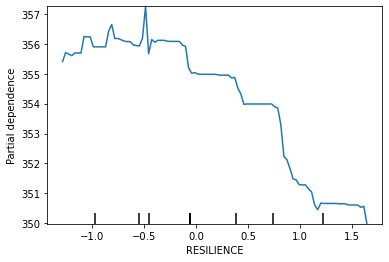

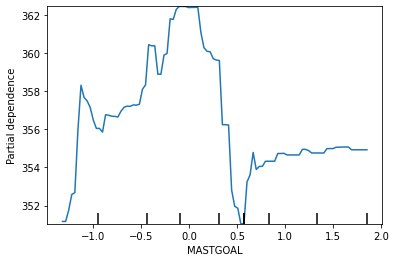

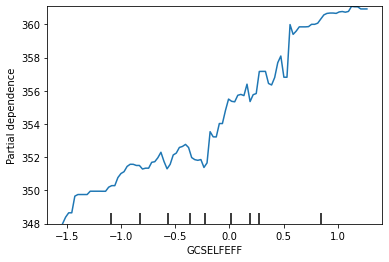

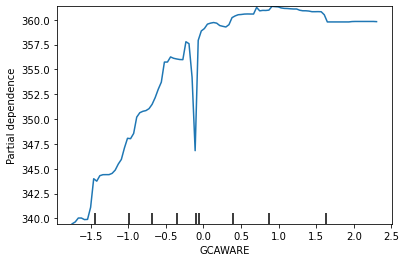

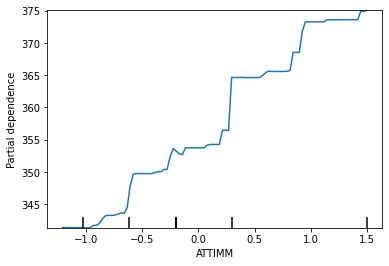

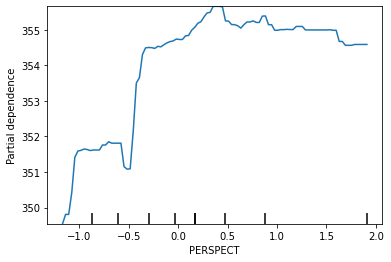

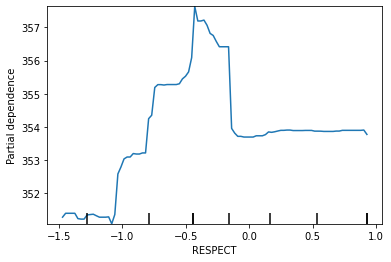

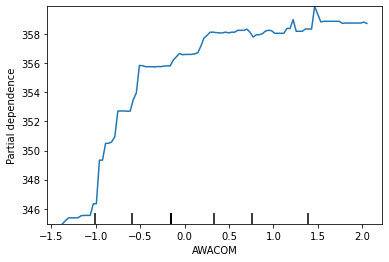

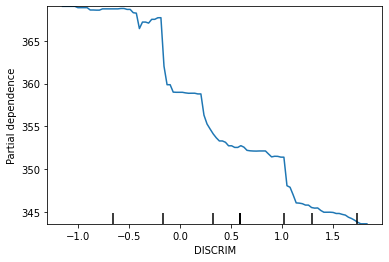

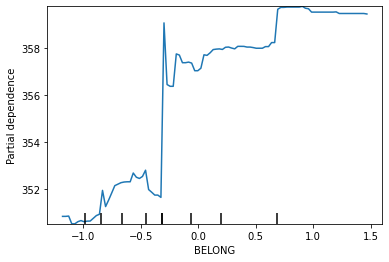

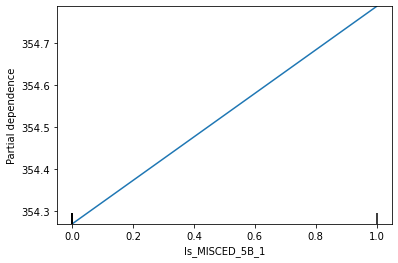

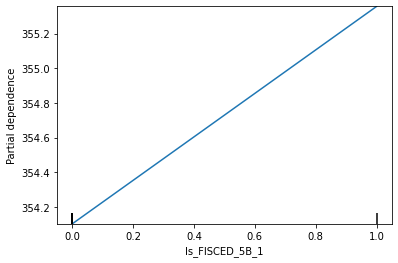

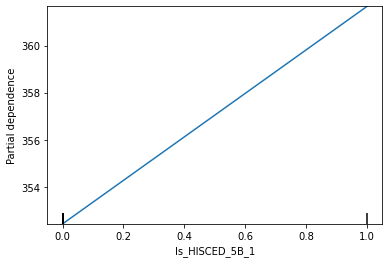

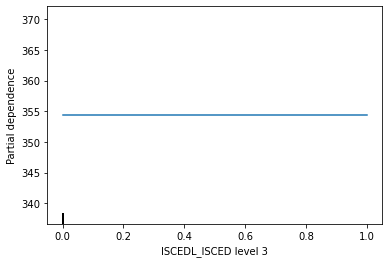

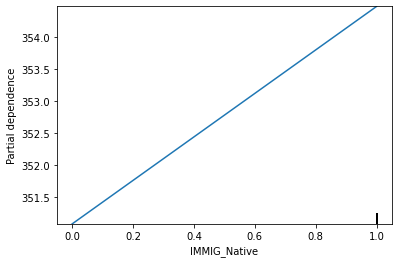

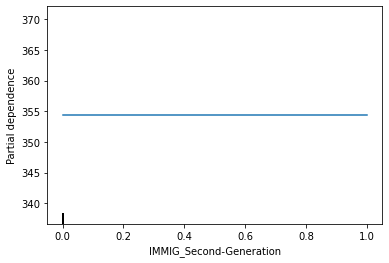

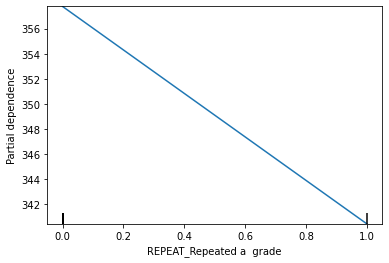

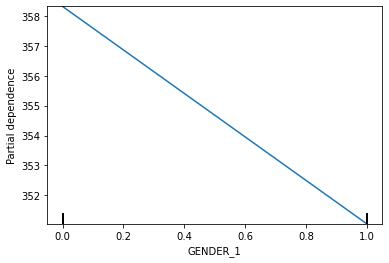

In [82]:
from sklearn.inspection import PartialDependenceDisplay
for cols_name in X_train.columns:
    PartialDependenceDisplay.from_estimator(XGReg2, X_train, [cols_name]);

In [76]:

#interpretml 
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression
from interpret.perf import RegressionPerf

In [77]:
lg = LinearRegression(random_state=42)
lg.fit(X_train, y_train)

lg_global = lg.explain_global()
show(lg_global)


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`


<!-- http://127.0.0.1:7927/2212827660400/ -->

In [78]:
lg_perf = RegressionPerf(lg.predict).explain_perf(X_test, y_test, name='LinearRegression')
show(lg_perf)

<!-- http://127.0.0.1:7927/2212826312176/ -->

In [79]:
ebm = ExplainableBoostingRegressor(random_state=42, n_jobs=-1, feature_names = X_train.columns)
ebm.fit(X_train, y_train) 

ExplainableBoostingRegressor(feature_names=['GRADE', 'HISEI', 'ESCS', 'METASUM',
                                            'HOMEPOS', 'DISCLIMA', 'EMOSUPS',
                                            'TEACHINT', 'JOYREAD', 'SCREADCOMP',
                                            'SCREADDIFF', 'PISADIFF',
                                            'WORKMAST', 'RESILIENCE',
                                            'MASTGOAL', 'GCSELFEFF', 'GCAWARE',
                                            'ATTIMM', 'PERSPECT', 'RESPECT',
                                            'AWACOM', 'DISCRIM', 'BELONG',
                                            'Is_MISCED_5B_1', 'Is_FISCED_5B_1',
                                            'Is_HISCED_5B_1',
                                            'ISCEDL_ISCED level...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'categorical',
                                            'categorical', 'categorical',
                                            'categorical', 'categorical',
                                            'categorical', 'categorical', ...],
                             n_jobs=-1)

In [80]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7927/2212829426976/ -->

In [81]:
ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7927/2212829449904/ -->